# 파이썬 데이터 시각화 Seaborn 사용법 심화편
https://www.snugarchive.com/blog/python-data-visualization-seaborn-advanced/

1. 범주형 데이터 시각화
  - 빈도 막대그래프(병렬) : catplot(kind = 'count')
  - 빈도 막대그래프(다중,누적) : countplot
2. 수치형 데이터 시각화
  - 점 그래프(dot plot) : stripplot, swarmplot
  - 선분 그래프(rug plot) : rugplot
  - 요약 통계값 막대그래프 : barplot
  - 요약 통계값 포인트그래프 : pointplot
  - 히스토그램(histogram) : histplot
  - 밀도그림(density plot) : kdeplot
  - 경험적 누적분포함수(empirical cumulative distribution function) : ecdfplot
  - 상자그림(box plot) : boxplot, boxenplot, violinplot
  - 선그래프(line plot) : lineplot
  - 산점도(scatter plot) : scatterplot
  - 결합/주변분포토(joint/marginal distribution plot) : jointplot
  - 산점도 행렬(scatter plot matrix) : pairplot
  - 상관 행렬(correation matrix) : heatmap, clustermap
  - 회귀그래프 (regression plot) : regplot, implot, residplot
  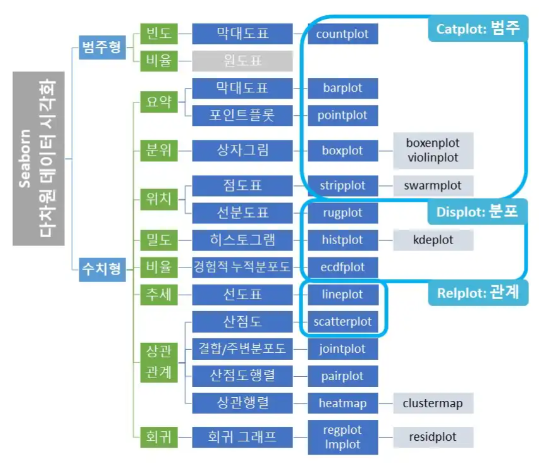

## 기본 환경 설정



```
# 코드로 형식 지정됨
```

colab 나눔(Nanum) 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 패키지 임포트
import numpy as np                  # Numpy(넘파이) 패키지 임포트
import pandas as pd                 # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt     # Matplotlib(맷플롯립) 패키지의 pyplot모듈을 plt로 임포트
from matplotlib import rcParams     # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns               # seaborn(씨본) 패키지 임포트
import warnings

# 한글 환경 설정
def setting_styles_basic():
  # rcParams['font.family'] = 'Malgun Gothic'     # Window
  rcParams['font.family'] = 'NanumBarunGothic'    # Window
  # rcParams['font.family'] = 'AppleGothic'       # Max

  rcParams['axes.unicode_minus'] = False

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

In [ ]:
# 그래프의 스케일(scale)조정
sns.set_context('paper', # notebook, talk, poster
                rc = {
                    'font.size' : 15,
                    'xtick.labelsize' : 15,
                    'ytick.labelsize' : 15,
                    'axes.labelsize' : 15
                })

## 데이터 불러오기 (Feat. seaborn)

In [ ]:
df_titanic = sns.load_dataset('titanic')      # 타이타닉호 데이터
df_iris = sns.load_dataset('iris')            # 붓꽃 데이터
df_penguins = sns.load_dataset('penguins')    # 펭귄 데이터
df_tips = sns.load_dataset('tips')            # 팁 데이터
df_diamonds = sns.load_dataset('diamonds')    # 다이아몬트 데이터
df_planets = sns.load_dataset('planets')      # 행성 데이터
df_flights = sns.load_dataset('flights')      # 비행 데이터

from sklearn.datasets import load_wine
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)   # 와인 데이터

## 다차원 데이터 시각화 : 범주형

### 1) 병렬 막대그래프
- 병렬 막대그래프는 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(canvas)에 병렬로 나열한 그래프입니다.

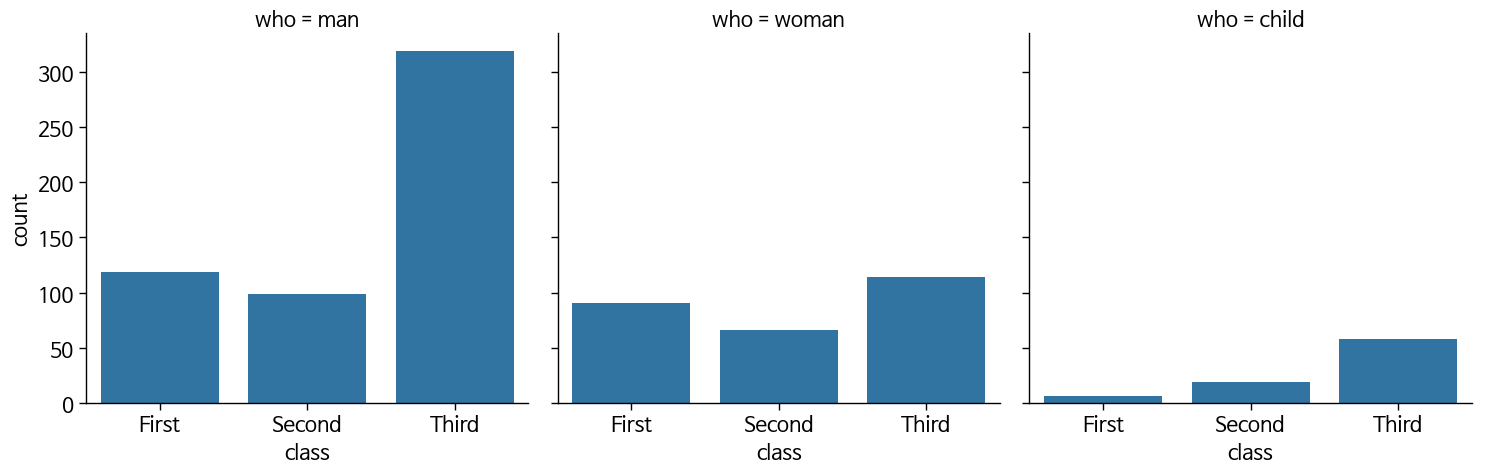

In [ ]:
# df_titanic['class'].unique()      # ['First', 'Second', 'Third']
# df_titanic['who'].unique()        # ['man', 'woman', 'child']
sns.catplot(x = 'class',
            col = 'who',        # 캔버스 분리하기
            kind = 'count',     # 빈도 막대그래프 그리기
            data = df_titanic)

### 2)다중 막대그래프
- 다중 막대그래프는 sns.countplot() 또는 sns.catplot() 에 ```hue``` 파라미터를 설정해서 그릴 수 있습니다.
  - ```hue``` 옵션은 변량을 색상으로 구분하는 파라미터입니다.

#### 수직 다중 막대그래프
- ```sns.countplot``` 함수 또는 ```sns.caplot``` 함수로 수직 다중 막대그래프를 그리려면 해당 함수의 ```x``` 파라미터에 가로축 범주로 사용할 DataFrame 의 열 이름을 입력하고, ```hue``` 파라미터에 다른 색상으로 구분할 DataFrame 의 열 이름을 입력하면 됩니다.

<Axes: xlabel='class', ylabel='count'>

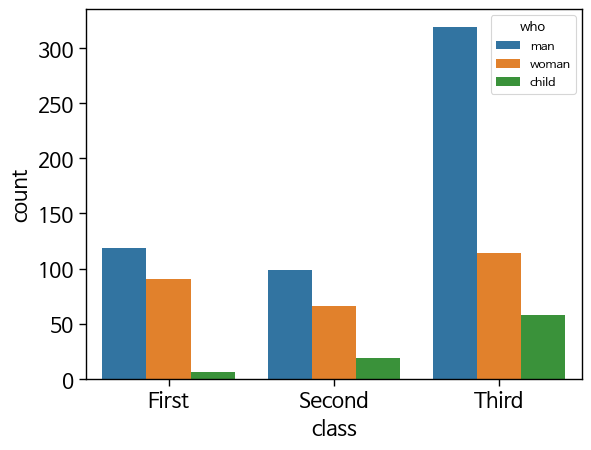

In [ ]:
sns.countplot(x = 'class', hue = 'who', data = df_titanic)

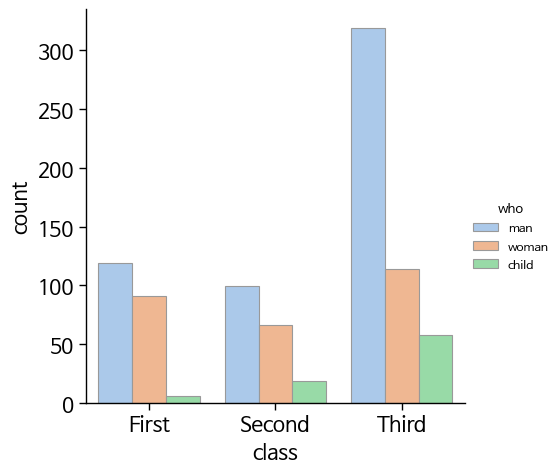

In [ ]:
sns.catplot(x = 'class', hue = 'who', kind = 'count',
            palette = 'pastel',
            edgecolor = '.6',       # 막대 테두리 생상 투명도 지정
            data = df_titanic)

```sns.histplot``` 함수에 ```multiple='dodge'``` 옵션을 주어도 다중 막대그래프를 그릴 수 있습니다.
  - ```sns.histplot``` 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만, 히스토그램의 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있습니다.

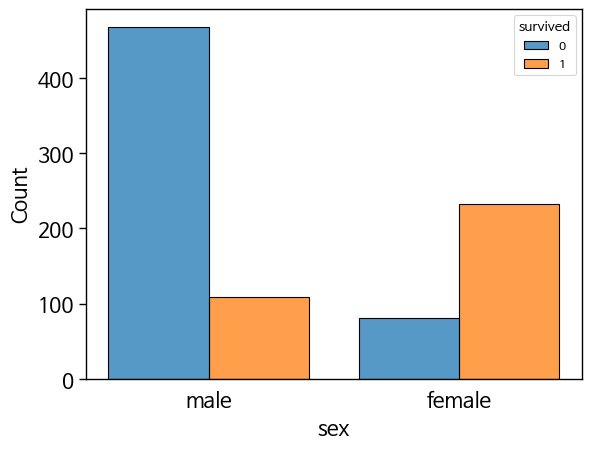

In [ ]:
ax = sns.histplot(x = 'sex', hue = 'survived',
                  multiple = 'dodge',     # 다중 막대그래프 그리기
                  shrink = .8,            # 막대 사이 간격 조정
                  data = df_titanic
                  )

# 이거 차이가 없는데 뭔지 추가확인 필요!!
ax.tick_params(bottom = False)    # x축 눈금 숨기기

#### 수평 다중 막대그래프
- 수평 다중 막대그래프를 그리고 싶다면 수직 다중 막대그래프를 그릴 때 사용한 함수에 ```x``` 파라미터 대신 ```y``` 파라미터를 사용하면 됩니다.

<Axes: xlabel='count', ylabel='class'>

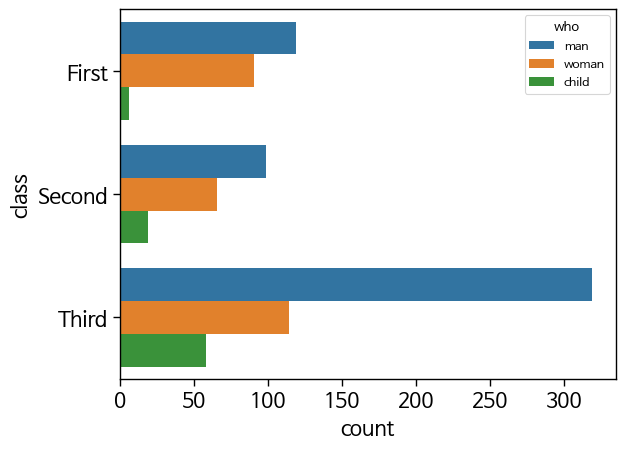

In [ ]:
sns.countplot(y = 'class', hue = 'who', data = df_titanic)

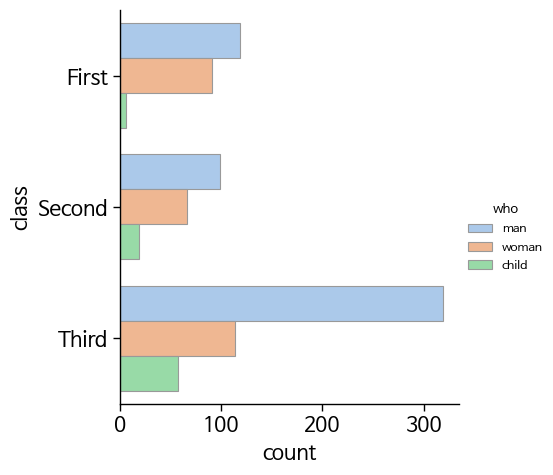

In [ ]:
sns.catplot(y = 'class', hue = 'who', kind = 'count',
            palette = 'pastel', edgecolor = '.6',
            data = df_titanic)

### 3) 누적 막대그래프
- seaborn으로 누적 막대그래프를 만들려면, ```sns.histplot``` 함수에 ```multiple = 'stack'``` 옵션을 주면 됩니다.

#### 단순 수직 누적 그래프

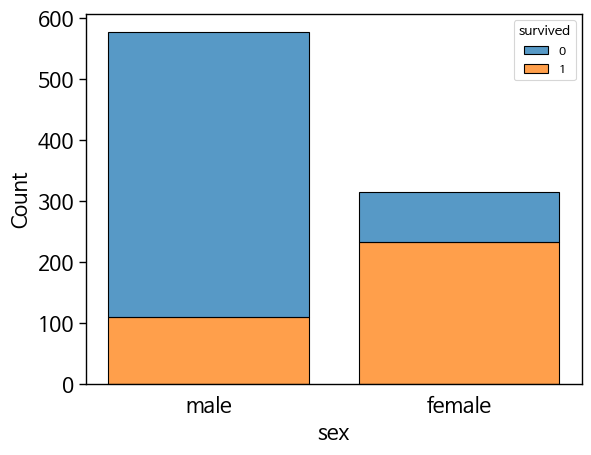

In [ ]:
ax = sns.histplot(x = 'sex', hue = 'survived',
                  multiple = 'stack',   # 누적 막대그래프 그리기
                  shrink = .8,          # 막대 사이 간격 조정
                  data = df_titanic
                  )

ax.tick_params(bottom = False)    # x축 눈금 숨기기

#### 단순 수평 누적 막대그래프
- 수평 누적 막대그래프를 그리려면 ```x``` 파라미터 대신 ```y``` 파라미터를 사용하면 됩니다.

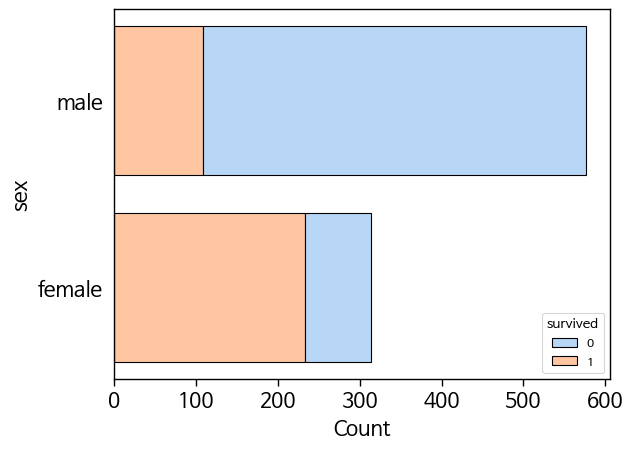

In [ ]:
ax = sns.histplot(y = 'sex', hue = 'survived',
                  multiple = 'stack',     # 누적 막대그래프 그리기
                  shrink = .8,            # 막대 사이 간격 조정
                  palette = 'pastel',     # 색상 팔레트 지정
                  data = df_titanic
                  )

# 이거 하나 안하나,, 바뀌는게 읍다!!
ax.tick_params(left = False)    # y축 눈금 숨기기

지금까지 다중 막대그래프와 누적 막대그래프로 이변량 범주형 데이터를 시각화하는 법을 알아보았습니다. 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할때는 모자이크 그래프(mosaic plot)를 사용하기도 합니다. 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프입니다. 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있습니다.
- 모자이크 그래프는 ```statmodels.graphics.mosaic``` 패키지의 ```mosaic``` 함수를 이용해서 그립니다.

Text(0.5, 1.0, '타이타닉호 성별 생존자')

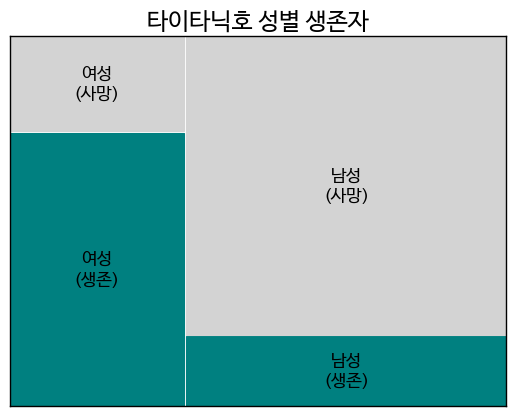

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

props = lambda key : {'color' : 'teal' if '1' in key else 'lightgray'}
labelizer = lambda k : { ('female', '1') : '여성\n(생존)', ('female', '0') : '여성\n(사망)',
                        ('male', '1') : '남성\n(생존)', ('male', '0') : '남성\n(사망)'}[k]

mosaic(df_titanic.sort_values('sex'),
           ['sex', 'survived'],
            properties = props,       # 색상 변경
           labelizer = labelizer,     # 라벨 변경
           axes_label = False         # 축 라벨 숨기기
           )
plt.title('타이타닉호 성별 생존자', fontsize = 17)      # 제목 내용 및 글자 크기 설정

## 다차원 데이터 시각화 : 수치형

### 1) 점그래프
- 점 그래프는 데이터포인트를 점으로 나타낸 도표입니다. 점 그래프를 이용하면 데이터의 실제 위치와 분포를 한눈에 파악할 수 있습니다.
  - seaborn에서 점 그래프를 그리는 기본 함수는 ```sns.stripplot``` 입니다.

#### stripplot (catplot(kind = 'strip'))

<Axes: >

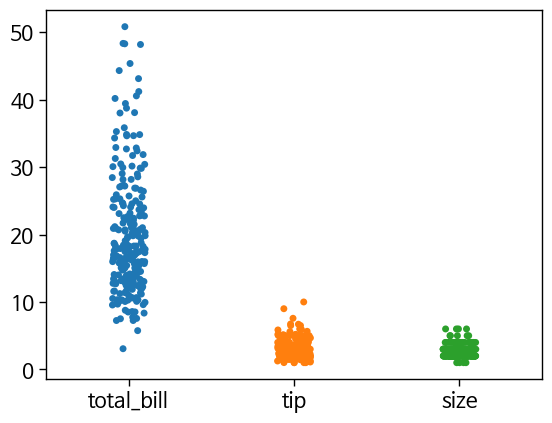

In [ ]:
sns.stripplot(data = df_tips)

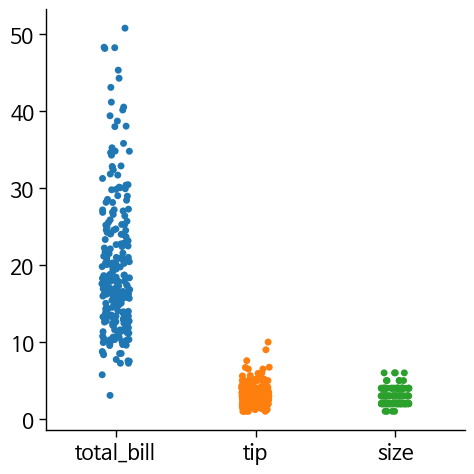

In [ ]:
sns.catplot(kind = 'strip', data = df_tips)

```sns.stripplot``` 함수에 ```jitter``` 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있습니다.
- jitter : 지터(jitter)는 데이터 값에 약간의 노이즈를 추가하는 것, 노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 그래프에 여러 번 겹쳐서 표시되는 현상을 막아줌.

<Axes: xlabel='total_bill', ylabel='smoker'>

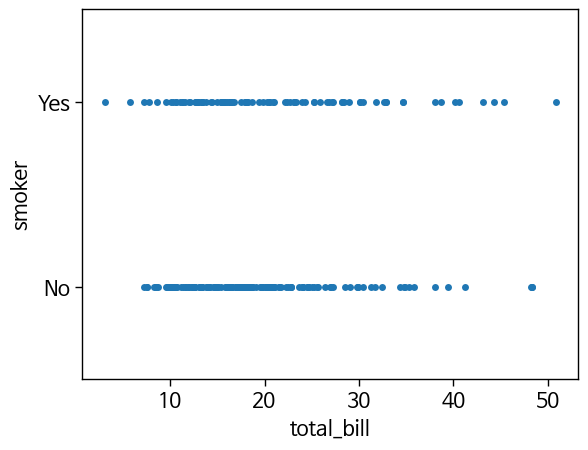

In [ ]:
sns.stripplot(x = 'total_bill', y = 'smoker',
             jitter = False,
             data = df_tips)

데이터 포인트가 서로 겹치는 것을 방지하려면, ```dodge = True``` 옵션을 사용하면 됩니다.
- dodge = True : hue로 구분된 그룹 사이 간격을 만들어 데이터가 겹치는 것을 방지

In [ ]:
df_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Axes: xlabel='tip', ylabel='day'>

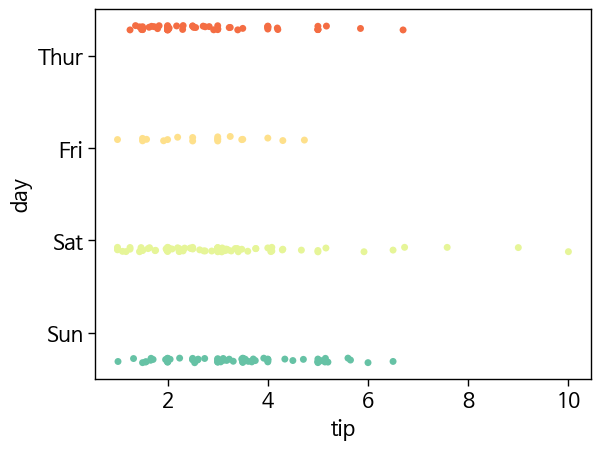

In [ ]:
sns.stripplot(x = 'tip', y = 'day',
              palette = 'Spectral',   # 색상 팔레트 지정
              dodge = True,
              data = df_tips
              )

```dodge = True``` 옵션처럼 점그래프에서 데이터 포인트들이 서로 겹치지 않고 새의 무리처럼 보이게 그래프를 만드는 방법도 있습니다.
- 이때 사용하는 함수가 ```sns.swarmplot``` 입니다.

#### swarmplot (catplot(kind = 'swarm'))
- ```swarmplot``` 함수를 이용하면 점도표의 데이터 포인트를 떼(swarm) 처럼 무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있습니다.

<Axes: >

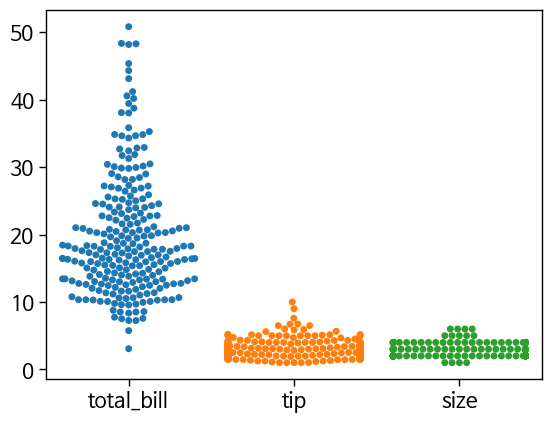

In [ ]:
sns.swarmplot(data = df_tips)

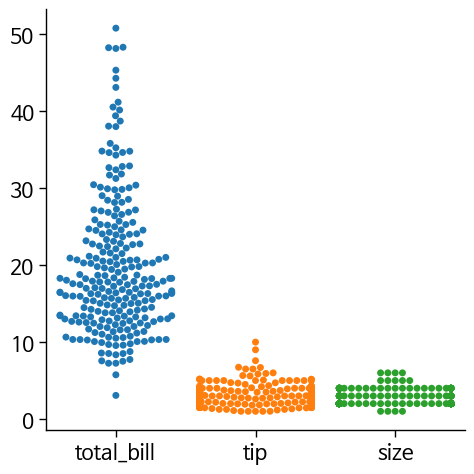

In [ ]:
sns.catplot(kind = 'swarm', data = df_tips)

```x``` 와 ```y``` 파라미터를 사용하면, 각 변수에 대한 떼 플롯을 만들 수 있습니다.

<Axes: xlabel='day', ylabel='total_bill'>

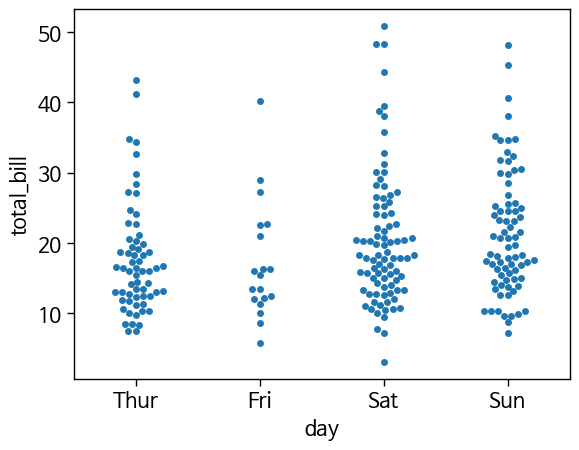

In [ ]:
sns.swarmplot(x = 'day', y = 'total_bill', data = df_tips)

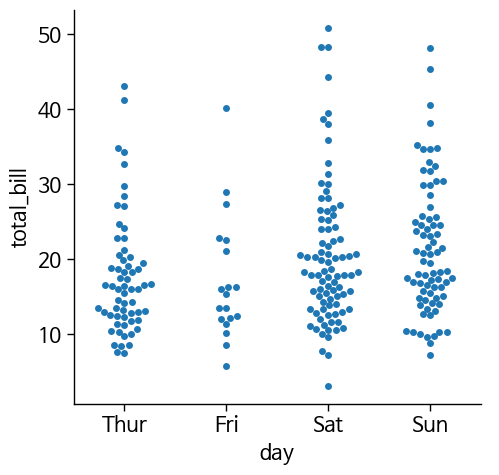

In [ ]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'swarm', data = df_tips)

### 2) 선분 그래프
- 실수 데이터의 분포를 선분으로 표현하고 싶다면, ```sns.rugplot``` 함수를 이용하면 됩니다. ```sns.rugplot``` 은 데이터포인트를 각 축 위에 보여줍니다.

<Axes: xlabel='total_bill', ylabel='tip'>

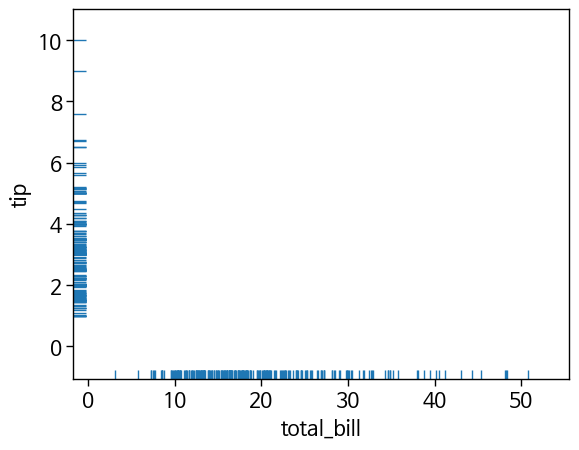

In [ ]:
sns.rugplot(x = 'total_bill', y = 'tip', data = df_tips)

보통 선분그래프는 다른 그래프와 함께 그립니다. 그래프를 겹쳐 그리려면 그래프 함수를 연이어 사용하면 됩니다.

<Axes: xlabel='total_bill', ylabel='tip'>

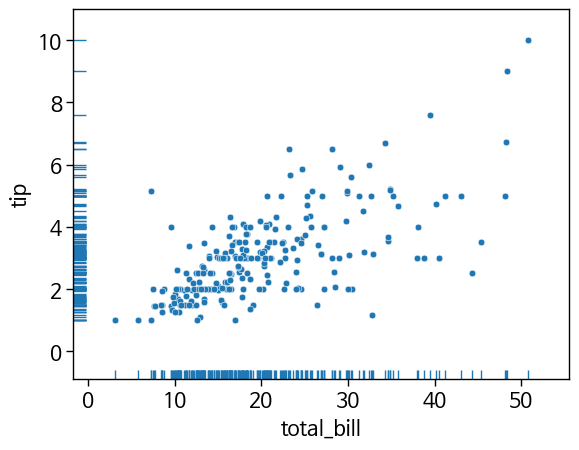

In [ ]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df_tips)
sns.rugplot(x = 'total_bill', y = 'tip', data = df_tips)

### 3) 요약 통계값 막대그래프
- 요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals) 을 나타낸 막대그래프입니다. 신뢰구간은 막대 위 검정색 수직 선으로 표현됩니다.
- 요약 통계값 막대그래프를 그리려면 ```sns.barplot``` 함수를 사용하면 됩니다. ```sns.catplot``` 함수에 ```kind = 'bar'``` 옵션을 주어도 됩니다.

#### 수직 요약 막대그래프

<Axes: xlabel='day', ylabel='total_bill'>

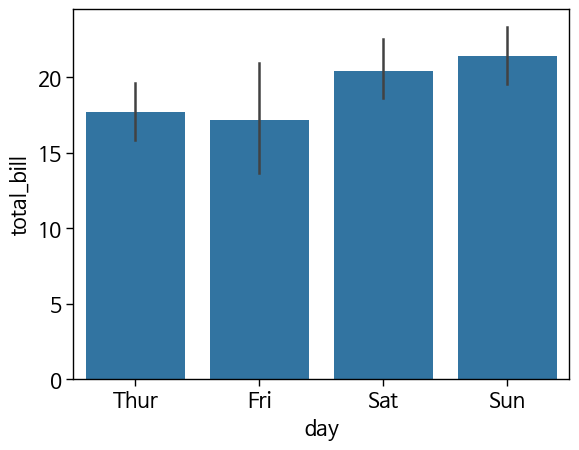

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', data = df_tips)

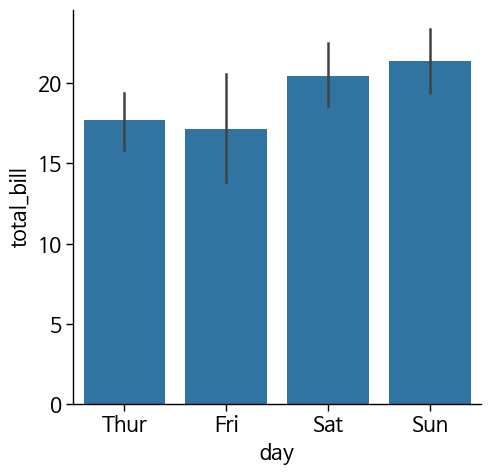

In [ ]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'bar', data = df_tips)

여기에 ```ci='sd'``` 옵션을 주면 신뢰구간이 아니라 표준편차(standard deviation)를 표현할 수 있습니다.

<Axes: xlabel='day', ylabel='total_bill'>

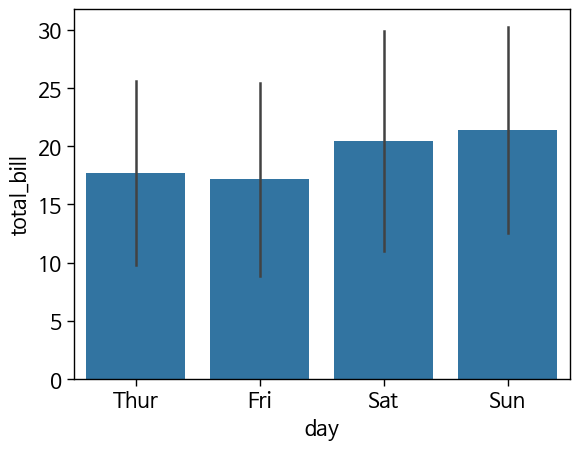

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', data = df_tips, ci = 'sd')

#### 수평 요약 막대그래프

만일 요약 막대그래프를 수평으로 그리고 싶다면 ```sns.barplot``` 함수에 ```orient = 'h'``` 옵션을 추가하면 됩니다.

<Axes: xlabel='total_bill', ylabel='day'>

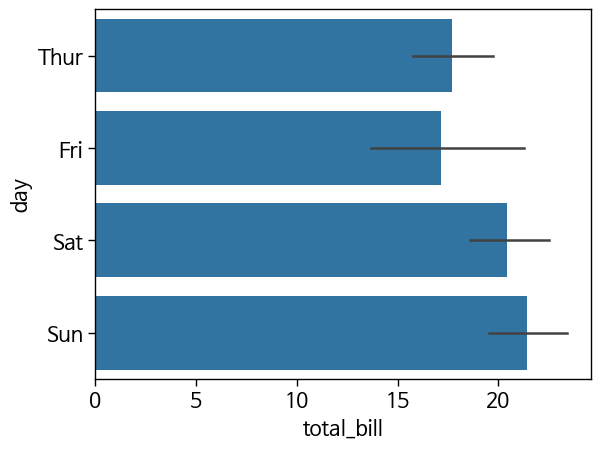

In [ ]:
sns.barplot(x = 'total_bill', y = 'day', orient = 'h', data = df_tips)

#### 다중 요약 막대그래프
- ```sns.barplot``` 함수에 ```hue``` 파라미터를 추가하면 평균을 나타내는 다중 막대그래프를 그릴 수 있습니다.

##### 수직 다중 요약 막대그래프
- 다음은 변량이 3개인 데이터를 수직 다중 요약 막대그래프로 표현하는 예시 코드입니다.

<Axes: xlabel='day', ylabel='total_bill'>

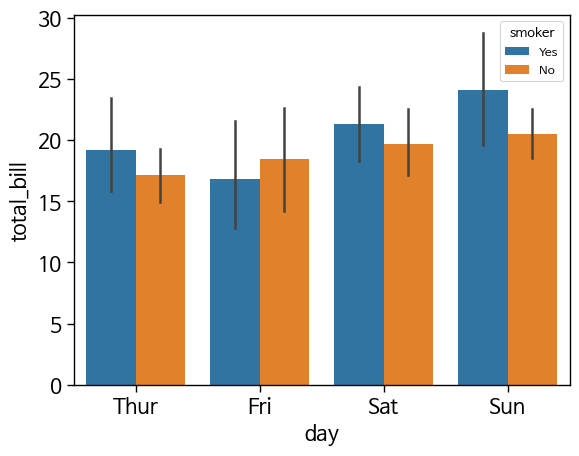

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', hue = 'smoker', data = df_tips)

##### 수평 다중 요약 막대그래프
- 수평 다중 요약 막대그래프를 그리고 싶으면 ```orient = h``` 파라미터 값을 추가하면 됩니다.

<Axes: xlabel='total_bill', ylabel='day'>

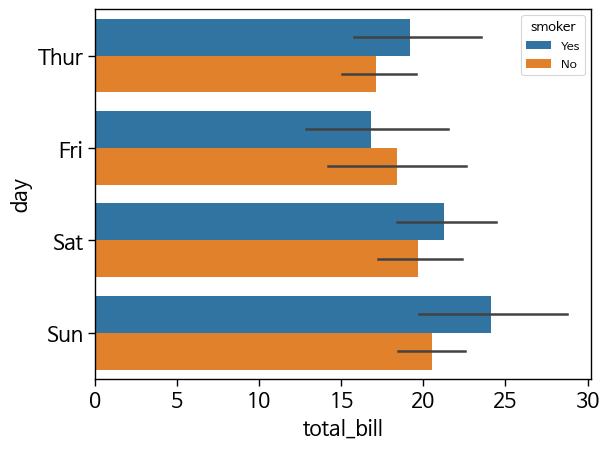

In [ ]:
sns.barplot(x = 'total_bill', y = 'day', hue = 'smoker', orient = 'h', data = df_tips)

#### 누적 요약 막대그래프
- 누적 요약 막대그래프를 그리고 싶다면 ```sns.barplot``` 함수에 ```dodge = False``` 를 추가하면 됩니다.
- seaborn에서 누적 막대그래프는 평균값을 나타내는 막대의 최대값 위에 다른 평균값을 나타내는 막대를 쌓아서 만드는 것이 아니라 그래프 자체를 서로 겹쳐서 그린 것입니다.

<Axes: xlabel='day', ylabel='total_bill'>

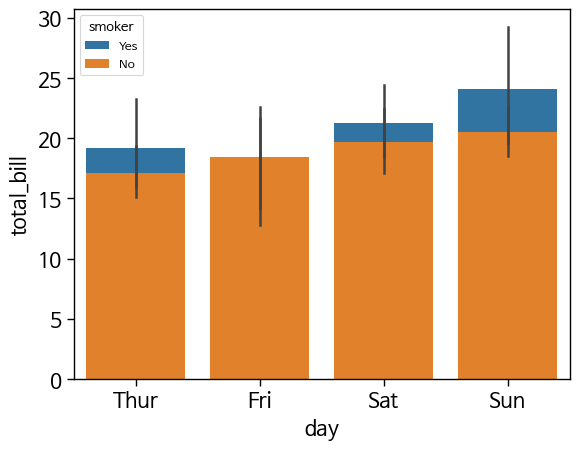

In [ ]:
sns.barplot(x = 'day', y = 'total_bill', hue = 'smoker', dodge = False, data = df_tips)

누적 요약 막대그래프는 ```sns.barplot``` 함수를 연이어 사용해서 그릴 수도 있습니다.

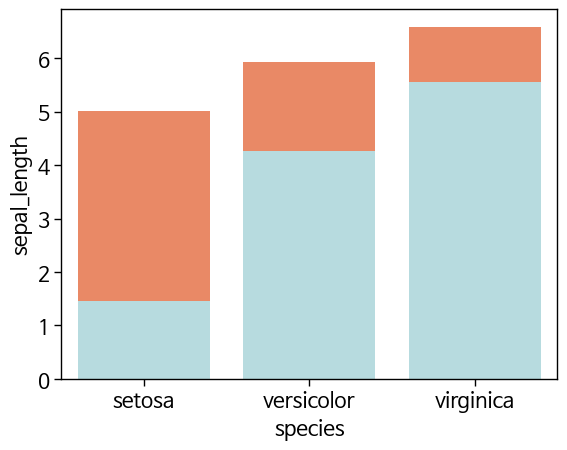

In [ ]:
s1 = sns.barplot(x = 'species', y = 'sepal_length', color = 'coral', ci = None, data = df_iris)
s2 = sns.barplot(x = 'species', y = 'petal_length', color = 'powderblue', ci = None, data = df_iris)

위 그래프에서 막대의 y축값(색칠된 부분)은 각각 ```sepal_length``` 의 평균과 ```petal_length``` 의 평균을 나타냅니다.

### 4) 포인트 플롯

```sns.barplot``` 을 이용해 그린 그래프에서는 평균을 막대로 표시했습니다. 만일 평균 값을 점으로 표현하고 평균에 대한 95% 신뢰구간을 나타내고 싶다면 ```sns.pointplot``` 함수를 이용할 수 있습니다.

<Axes: xlabel='day', ylabel='total_bill'>

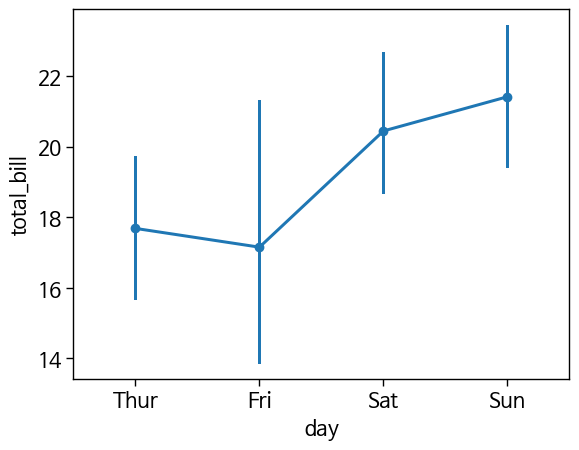

In [ ]:
sns.pointplot(x = 'day', y = 'total_bill', data = df_tips)

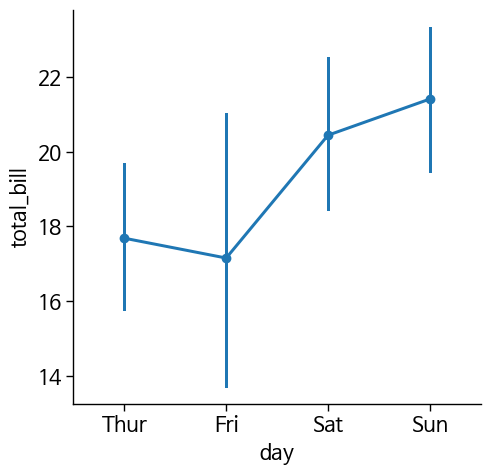

In [ ]:
sns.catplot(x = 'day', y = 'total_bill', kind = 'point', data = df_tips)

만일 신뢰구간이 아니라 표준편차를 표현하고 싶다면 ```ci='sd'```를 추가하면 됩니다.

<Axes: xlabel='day', ylabel='total_bill'>

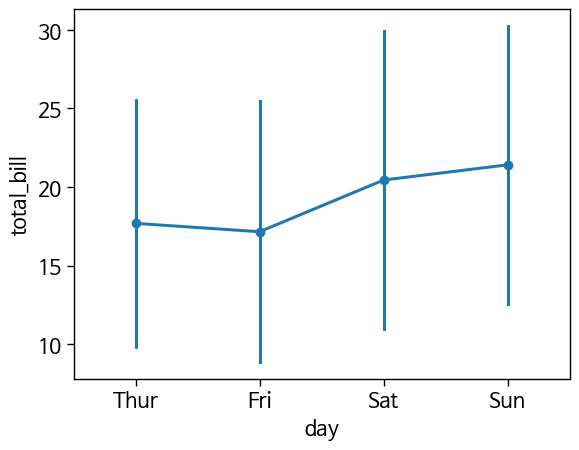

In [ ]:
sns.pointplot(x = 'day', y = 'total_bill', data = df_tips, ci = 'sd')

선과 포인트를 다른 모양으로 표현할 수 도 있습니다.

<Axes: xlabel='class', ylabel='survived'>

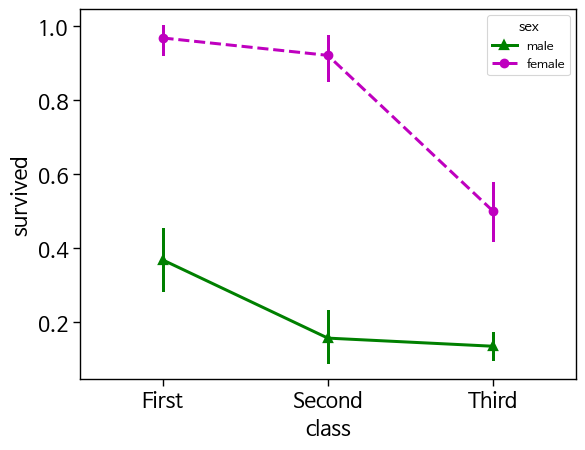

In [ ]:
sns.pointplot(x = 'class', y = 'survived', hue = 'sex',
              palette = {'male' : 'g', 'female' : 'm'},
              markers = ['^', 'o'],           # 마커 지정
              linestyles = ['-', '--'],       # 선 스타일 지정
              data = df_titanic
              )

지금까지 ```sns.barplot``` 함수와 ```sns.pointplot``` 함수를 이용해 요약 통계값을 표현하는 그래프를 만들어 보았습니다.
- 만일 자료의 요약값이 아니라 자료의 실제값을 등급에 따라 분류해 각 등급의 빈도수로 나타내고 싶다면 **히스토그램(histogram)**을 이용하면 됩니다.

### 5) 히스토그램

seaborn에서 히스토그램을 만드는 함수는 ```sns.histplot``` 입니다. ```sns.displot``` 함수를 이용해도 됩니다.

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

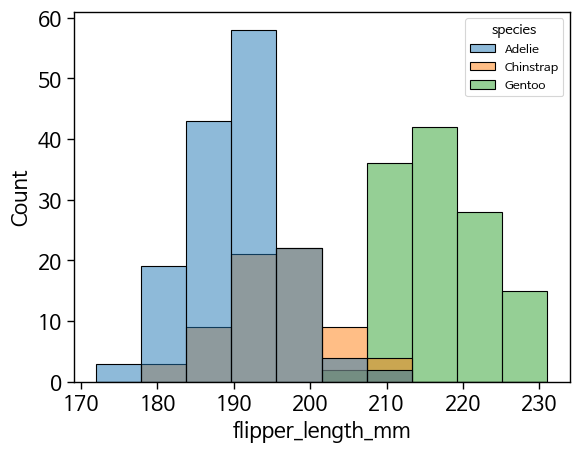

In [ ]:
sns.histplot(x = 'flipper_length_mm', hue = 'species', data = df_penguins)

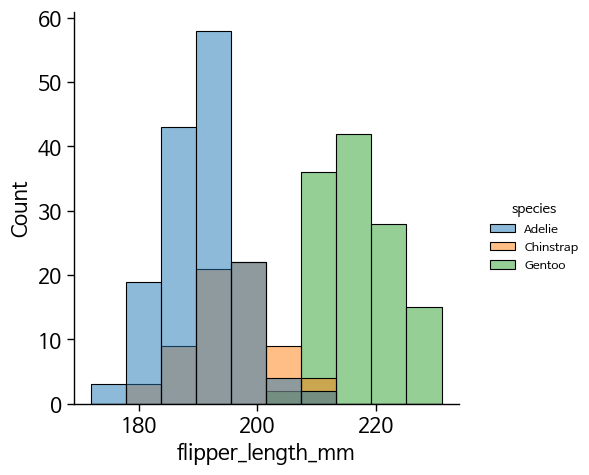

In [ ]:
sns.displot(x = 'flipper_length_mm', hue = 'species', data = df_penguins)

- 옵션을 이용하면 다양한 종류의 히스토그램을 그릴 수 있습니다.
  - hue : 그룹 별 히스토그램
  - multiple = 'stack' : 누적 히스토그램
  - multiple = 'dodge' : 다중 히스토그램



```
# 코드로 형식 지정됨
```

#### 히스토그램 (element='step')

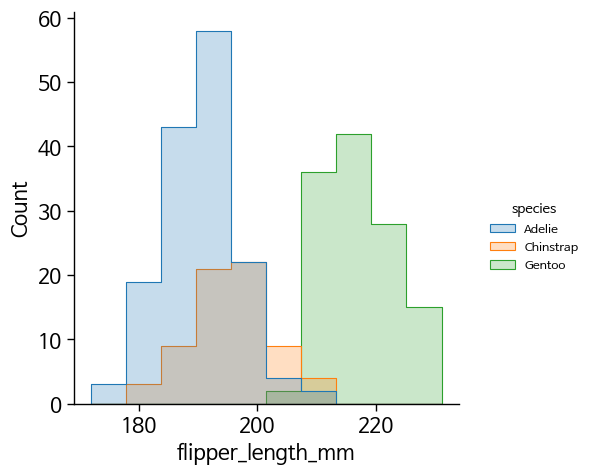

In [ ]:
sns.displot(x = 'flipper_length_mm', hue = 'species', element = 'step', data = df_penguins)

#### 히스토그램 (multiple = 'stack')

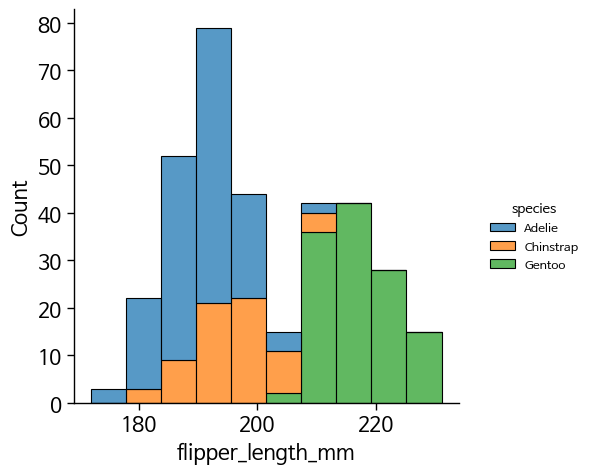

In [ ]:
sns.displot(x = 'flipper_length_mm', hue = 'species', multiple = 'stack', data = df_penguins)

#### 히스토그램 (multiple = 'dodge')

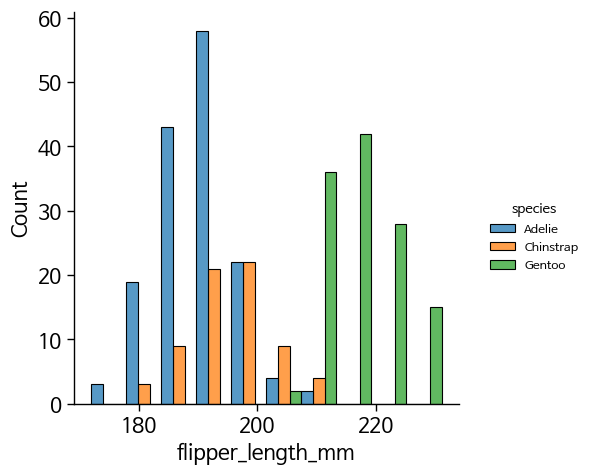

In [ ]:
sns.displot(x = 'flipper_length_mm', hue = 'species', multiple = 'dodge', data = df_penguins)

#### 히스토그램 (추가)

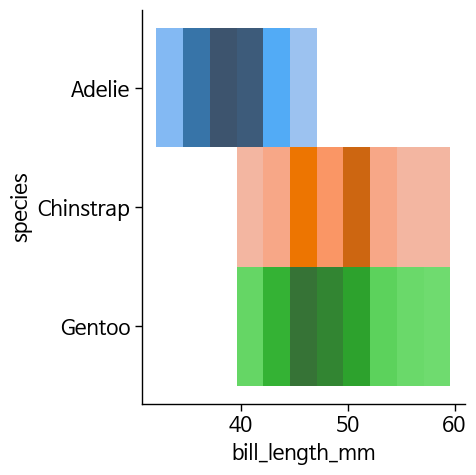

In [ ]:
sns.displot(x = 'bill_length_mm', y = 'species', hue = 'species', legend = False, data = df_penguins)

  ---
  - log_scale = True : x축 값 로그 스케일로 변환
  - element = 'poly' : 그래프를 분포다각형(distribution polygon) 으로 지정
  - fill = False : 그래프 선 아래 색깔 채우지 말기

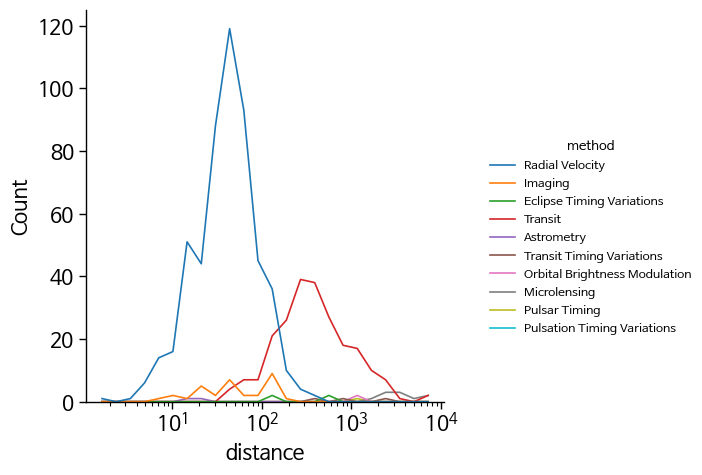

In [ ]:
sns.displot(x = 'distance', hue = 'method', log_scale = True, element = 'poly', fill = False, data = df_planets)

한 캔버스 내에 여러 그래프를 그리지 않고, 그래프를 서로 다른 캔버스에 나누어서 그리고 싶다면 ```col``` 옵션을 사용하면 됩니다. ```col``` 옵션은 그래프를 개별 캔버스에 나누어 그려줍니다.

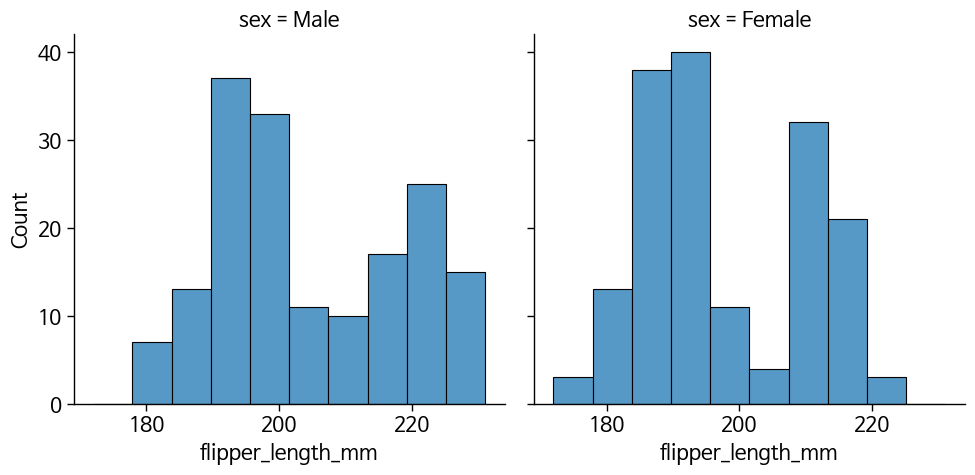

In [ ]:
sns.displot(x = 'flipper_length_mm',
            col = 'sex',      # 성별에 따라 캔버스 구분
            data = df_penguins)

만일 두 변량이 모두 수치형이라면 이변량 히스토그램은 히트맵(heatmap) 같은 모양을 띠게 됩니다.
- binwidth : 직사각형 크기 지정
- cbar : 색 집중도에 따른 빈도수를 나타내는 컬러바 유무 지정
- hue : 색으로 구분되는 그룹별 그래프 설정 (분포 간 중복되는 부분이 적어야 함)

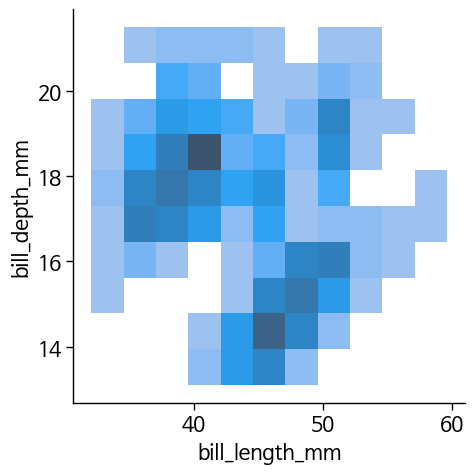

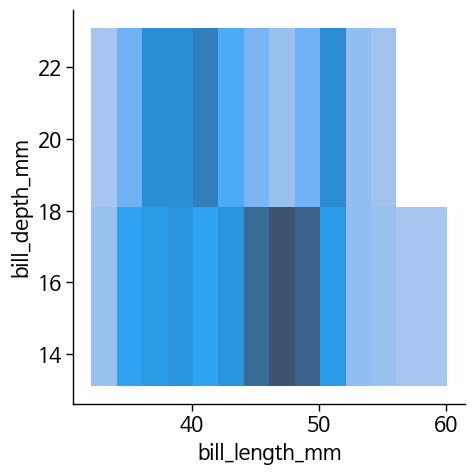

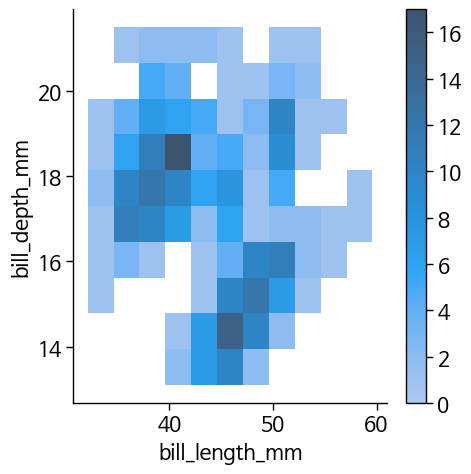

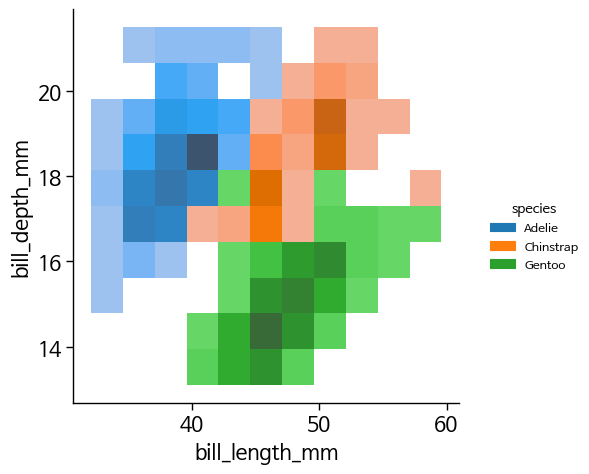

In [ ]:
# 2차원 - 기본
sns.displot(x = 'bill_length_mm', y = 'bill_depth_mm', data = df_penguins)

# 2차원 - 직사각형 넓이 조정
sns.displot(x = 'bill_length_mm', y = 'bill_depth_mm', binwidth = (2, 5), data = df_penguins)

# 2차원 - 컬러바 유무 지정
sns.displot(x = 'bill_length_mm', y = 'bill_depth_mm', cbar = True, data = df_penguins)

# 3차원 - 그룹별 색으로 분류
sns.displot(x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', data = df_penguins)


- 지금까지 여러가지 옵션을 이용해 다양한 종류의 기본 히스토그램을 그려보았습니다. 만일 그룹 별로 관측수가 다른 히스토그램을 비교하고 싶다면, 기본 히스토그램을 정규화(normalization) 하면 됩니다.
- 정규화는 모든 데이터포인트(data point)가 동일한 정도의 스케일(중요도)로 해석되도록 만드는 과정입니다. 정규화는 모든 데이터 포인트의 중요도를 균등하게 만듭니다. 따라서 이상치를 지닌 특정 속성이 전체 속성처럼 대표되는 일반화의 오류를 방지할 수 있습니다.
  - 정규화를 거친 히스토그램은 정규 히스토그램(nomalized histogram)이 됩니다.
  - 정규화를 위한 스케일링 기준점으로는 전체 관측수와 면적을 이용하는 방법이 있습니다. 먼저 전체 관측수로 정규화한 히스토그램을 만들어보겠습니다.

#### 정규 히스토그램(전체 관측수)
- seaborn에서 전체 관측수로 정규화한 히스토그램을 만들려면 ```sns.histplot``` 함수 또는 ```sns.displot``` 함수에 ```stat = 'probability'``` 또는 ```stat = 'percent'``` 옵션을 추가하면 됩니다. ```stat``` 옵션에 ```probability``` 인자를 주면 y축이 확률(probability)인 그래프가 그려집니다. 반면, ```percent``` 옵션을 사용하면 y축이 백분율(percent)인 그래프가 만들어집니다.
- 전자의 경우 막대들의 높이를 모두 더하면 1이 되고, 후자의 경우에는 100이 됩니다. 이 옵션을 추가하면 각 등급의 빈도수를 전체 관측수로 나눈 정규 히스토그램을 만들 수 있습니다.

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

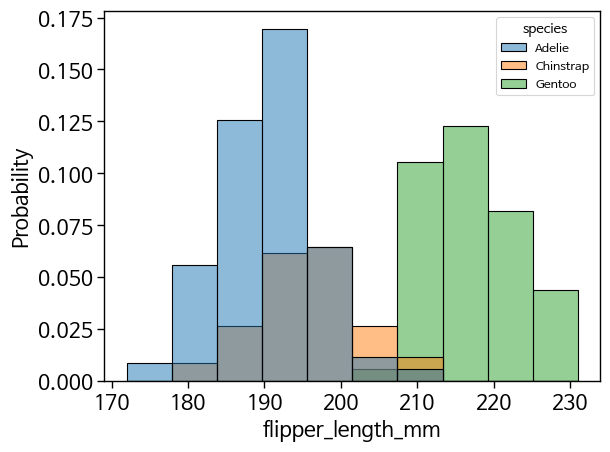

In [ ]:
# y축이 비율인 정규 히스토그램 (stat='probability')
sns.histplot(x = 'flipper_length_mm', hue = 'species', stat = 'probability', data = df_penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Percent'>

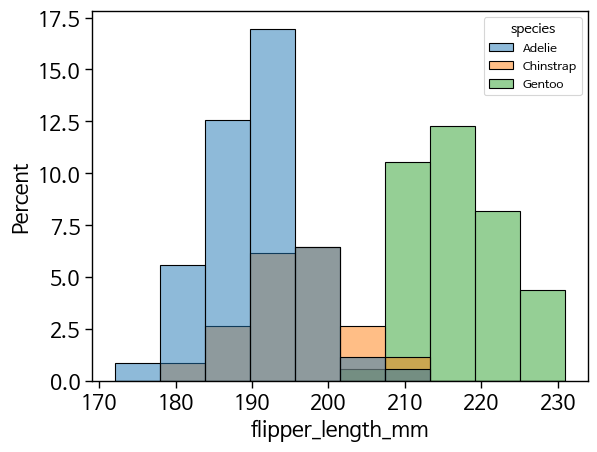

In [ ]:
# y축이 백분율인 정규 히스토그램 (stat='percent')
sns.histplot(x = 'flipper_length_mm', hue = 'species', stat = 'percent', data = df_penguins)

여기서 ```comment_norm``` 옵션을 ```False```로 지정하면 히스토그램을 전체 관측수가 아니라 개별 그룹의 관측수로 정규화할 수 있습니다. 이때 만들어지는 히스토그램은 서로 독립적입니다.

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

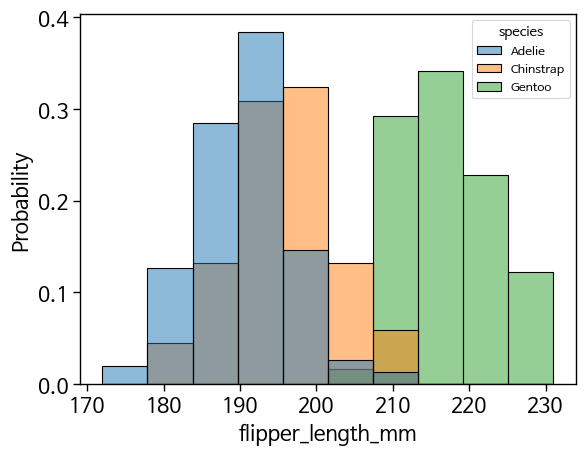

In [ ]:
# y축이 확률인 개별 히스토그램 (stat='probability', common_norm=False)
sns.histplot(x = 'flipper_length_mm', hue = 'species', stat = 'probability', common_norm = False, data = df_penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Percent'>

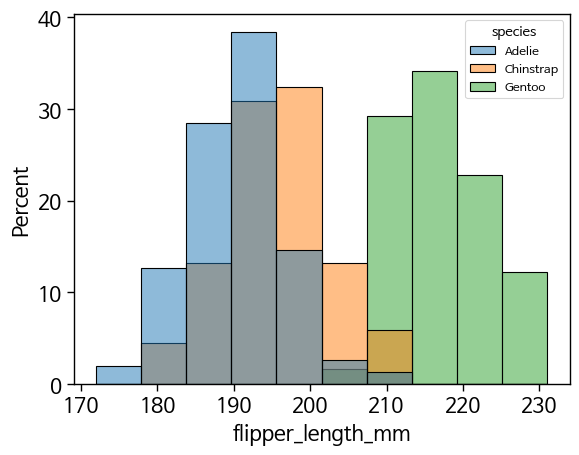

In [ ]:
# y축이 백분율인 개별 히스토그램 (stat='percent', common_norm=False)
sns.histplot(x = 'flipper_length_mm', hue = 'species', stat = 'percent', common_norm = False, data = df_penguins)

#### 정규 히스토그램(면적)
- seaborn에서 면적으로 정규화한 정규 히스토그램을 만들려면 ```stat='density'``` 옵션을 이용하면 됩니다. 이 옵션은 각 등급의 빈도수를 전체 관측치의 개수와 막대 너비(width)의 곱으로 나눈 정규 히스토그램을 만들어줍니다. 이 히스토그램에서 y축은 밀도(density)가 되고, 각 막대의 넓이를 모두 더한 합은 1이 됩니다.
- 만일 독립적인 히스토그램을 그리고 싶다면 ```common_norms=False``` 옵션을 추가하면 됩니다.

In [ ]:
df_penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

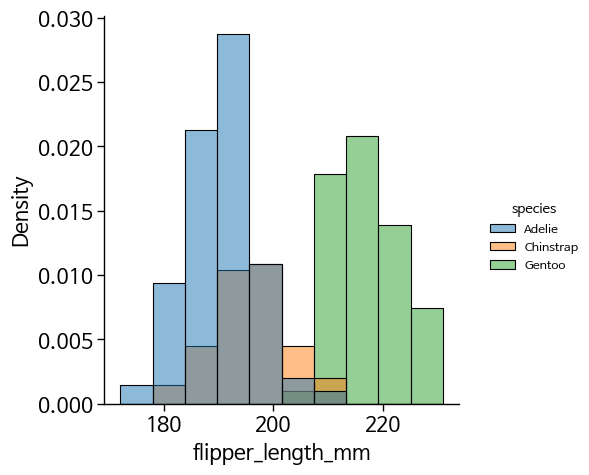

In [ ]:
# y축이 밀도인 정규 히스토그램 (stat = 'density')
sns.displot(df_penguins, x = 'flipper_length_mm', hue = 'species', stat = 'density')

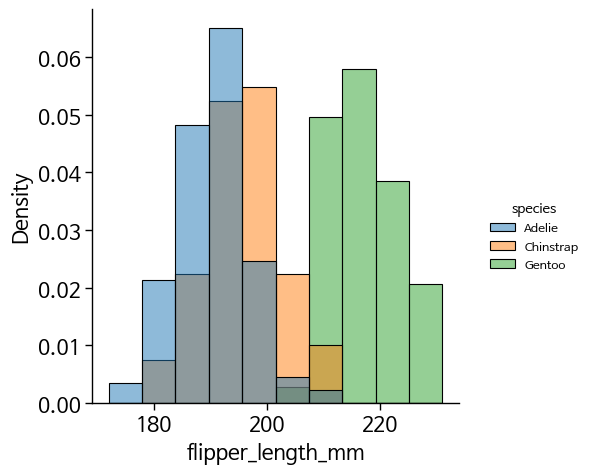

In [ ]:
# y축이 밀도인 개별 히스토그램 (stat = 'density', common_normal=False)
sns.displot(df_penguins, x='flipper_length_mm', hue = 'species', stat = 'density', common_norm = False)

- 지금까지 seaborn에서 기본 히스토그램과 2가지 종류의 정규 히스토그램을 만드는 법을 살펴보았습니다. 히스토그램은 직관적입니다. 히스토그램은 데이터의 분포를 빠르고 한눈에 파악하고 싶을때 사용하면 좋습니다.
- 하지만 한계도 있습니다. 히스토그램으로 확률밀도함수(Probability Density Function, PDF)를 나타내면 정확하지 않습니다. 히스토그램에서 등급의 수는 아무리 많게 잡아도 유한하기 때문입니다. 확률밀도함수는 매끄러운 곡선인데 히스토그램의 등급은 불연속적이다보니 히스토그램의 모양도 계단과 같이 울퉁불퉁하게 나타납니다.
- 또한, 히스토그램에서는 등급의 간격과 데이터의 시작 위치에 따라 히스토그램의 모양이 달라집니다. 데이터의 차원(dimension)이 증가할수록 히스토그램으로 데이터의 분포를 분석하거나 모델을 추정하는데 필요한 표본 데이터의 개수도 기하급수적으로 증가한다는 단점도 있습니다.
- 이러한 히스토그램의 단점을 개선한 방법이 있습니다. 바로 커널밀도추정(Kernel Density Estimation, KDE)입니다. 지금부터는 커널밀도추정이란 무엇인지 그리고 seaborn 라이브러리를 이용해 KDE곡선을 그리는 법을 알아보겠습니다.

### 6) 밀도그림

커널밀도추정이란 커널함수(kernel function)를 이용해서 확률변수의 확률밀도함수를 추정하는 비모수적(non-parametric) 통계 방법입니다. 비모수적 방법이란 관측 데이터가 특정 확률분포를 따른다는 전제 없이 실시하는 검정 방법입니다. 커널 함수란 원점을 중심으로 대칭을 이루고 양의(non-negative) 실수(real-valued)값을 가지며, 적분값이 1인 함수(k)를 뜻합니다. 커널 함수에는 대표적으로 가우시안(Gaussian), 코사인(cosine), Epanechnikov 함수 등이 있습니다.

- 밀도그림(density plot)은 커널 스무딩(kernel smoothing)을 이용해 추정한 히스토그램의 확률밀도함수입니다. KDE에서는 데이터를 커널 함수로 대치하여 히스토그램에서 나타났던 등급의 불연속성 문제를 해결합니다. KDE로 추정한 확률밀도함수는 부드러운 곡선입니다.
- 단, KDE 방법을 사용할 때는 조건이 있습니다. KDE 방법은 극단값이 없는 연속 자료에 사용합니다. 확률밀도함수는 부드러운 곡선인데 이상치가 있으면 해당 값에서 확률 밀도함수가 뾰족한 모양을 띠게 되기 때문입니다. 이상치가 있는 연속 자료에는 KDE보다는 히스토그램을 사용하는 것이 적합합니다.
- seaborn 에서 KDE 방법을 통해 확률밀도함수를 그리려면, ```sns.kdeplot``` 을 이용하면 됩니다. ```sns.displot``` 함수에 ```kind = 'kde'``` 옵션을 주어도 됩니다. 이번에는 ```sns.displot``` 함수에 ```kind='kde'``` 옵션을 추가해서 그려보겠습니다.
  - multiple='stack' : 그래프 쌓아서 그리기
  - multiple='fill' : 각 값에서 겹친분포(stacked distribution) 정규화해서 그리기 (단변량일때만 유효, 모든 값에서 y축의 밀도가 1)
  - fill=True : 그래프 불투명하게 그리기
  - cumulative=True : 누적분포함수 그리기

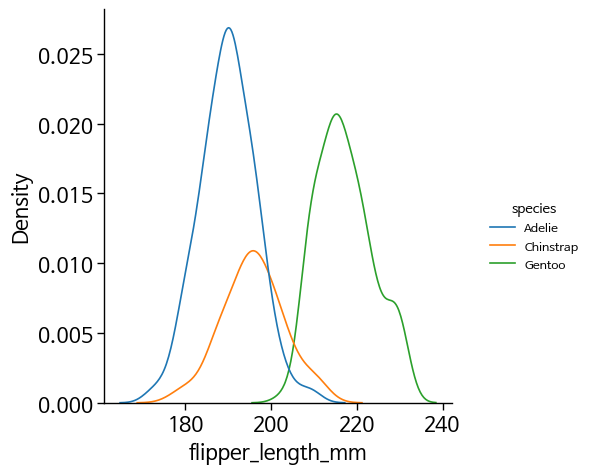

In [ ]:
# 기본 그래프
# kind='kde', hue='species'
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species')

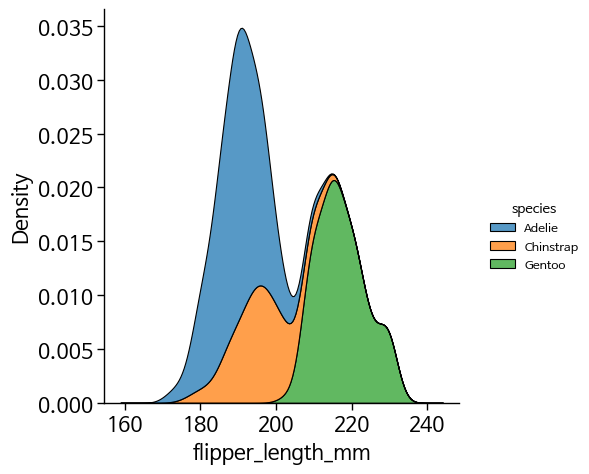

In [ ]:
# 그래프 겹쳐서 그리기
# kind='kde', hue='species', multiple='stack'
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species', multiple = 'stack')

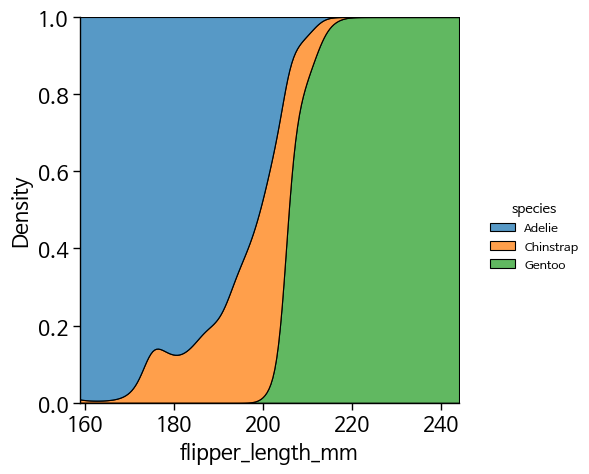

In [ ]:
# 모든 값에서 겹친 분포 정규화하기
# kind='kde', hue='species', multiple='fill'
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species', multiple = 'fill')

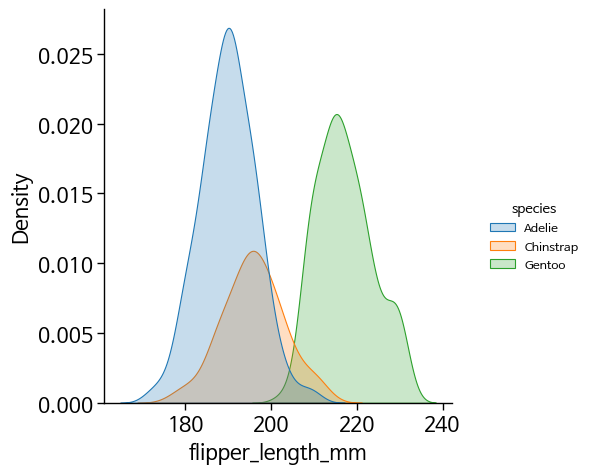

In [ ]:
# 그래프 불투명하게 그리기
# kind='kde', hue='species', fill=True
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species', fill = True)

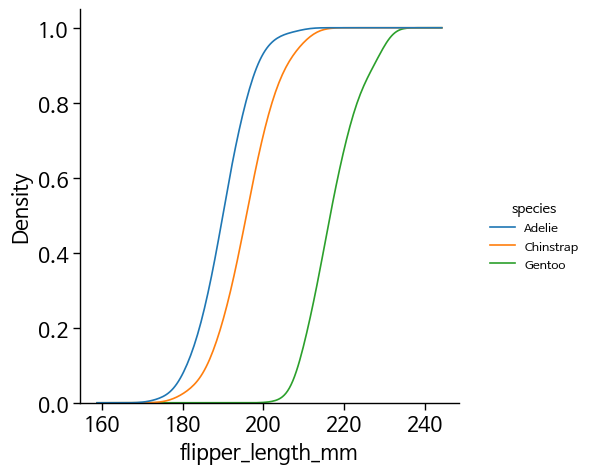

In [ ]:
# 누적분포함수(Cumulative Distribution Function, CDF) 그리기
# kind='kde', hue='species', cumulative=True, common_norm=False, common_grid=True
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species',
            cumulative = True, common_norm = False, common_grid = True)

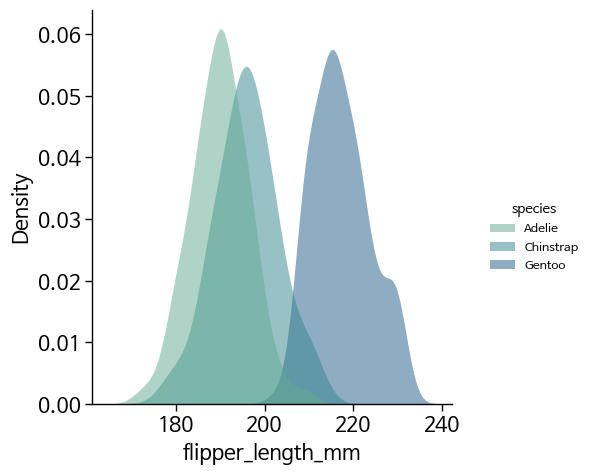

In [ ]:
# kind='kde', hue='species', fill=True, common_norm=False, palette='crest', alpha=.5, linewidth=0
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'kde', hue = 'species',
            fill = True, common_norm = False, palette = 'crest',
            alpha = .5, linewidth = 0)

이변량 KDE 그래프는 등고선(contours)으로 표현됩니다. 각 등고선은 밀도가 같은지점(iso-proportions)을 이은 것입니다.
  - thresh : 가장 낮은 레벨의 등고선 크기 조정
  - levels : 등고선 개수 또는 모양

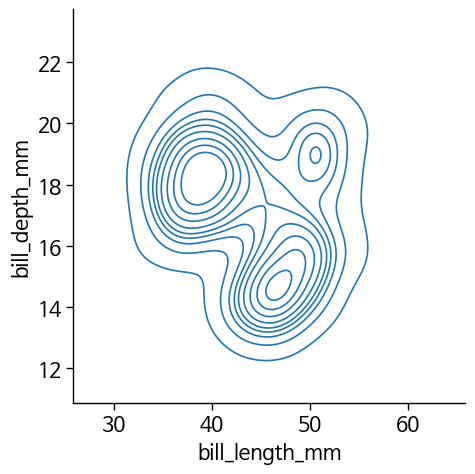

In [ ]:
# 2차원 - 기본 그래프
sns.displot(df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'kde')

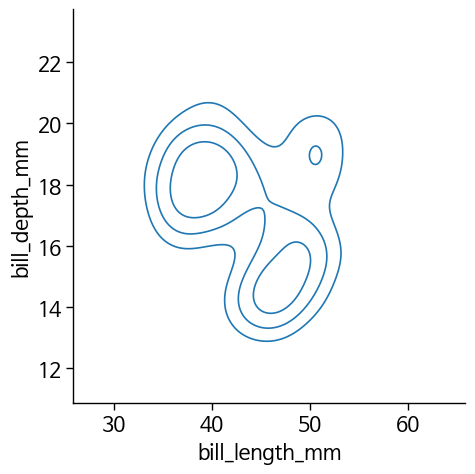

In [ ]:
# 2차원 - 등고선 크기 및 개수 조정
sns.displot(df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'kde', thresh = .2, levels = 4)

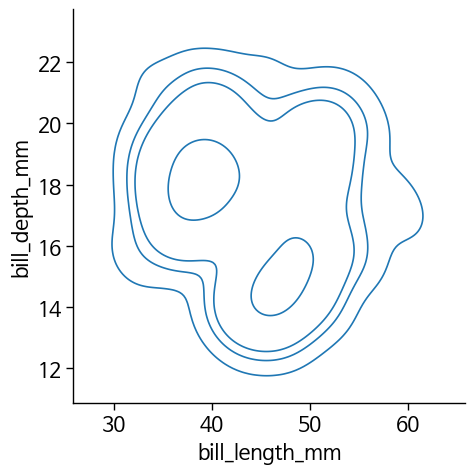

In [ ]:
# 2차원 - 개별 등고선 크기 지정
sns.displot(df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind='kde', levels = [.01, .05, .1, .7])

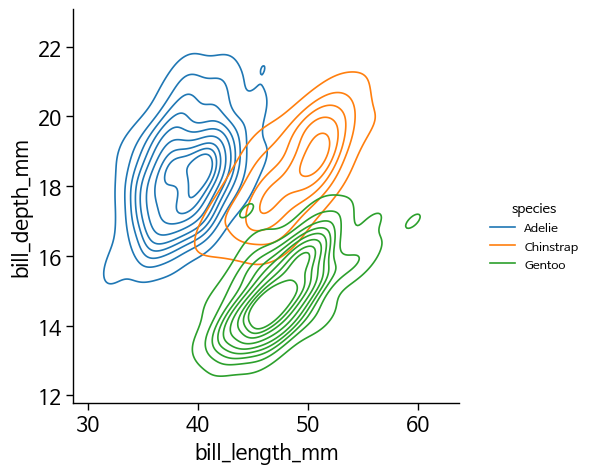

In [ ]:
# 3차원 - 그룹별 그래프 색으로 구분
sns.displot(df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', kind = 'kde', hue='species')#, fill = True)

### 7) 경험적 누적분포함수
- 경험적 누적분포함수를 그리려면 ```sns.ecdfplot``` 함수를 이용하거나, ```sns.displot``` 함수에 ```kind='ecdf'``` 옵션을 추가하면 됩니다.
  - hue_order : 색 순서 지정
  - complementary = True : 상보 누적분포함수(complementary cumulative distribution function, CCDF)

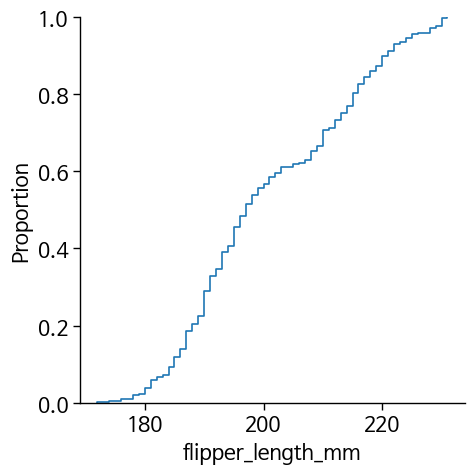

In [ ]:
# kind='ecdf'
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'ecdf')

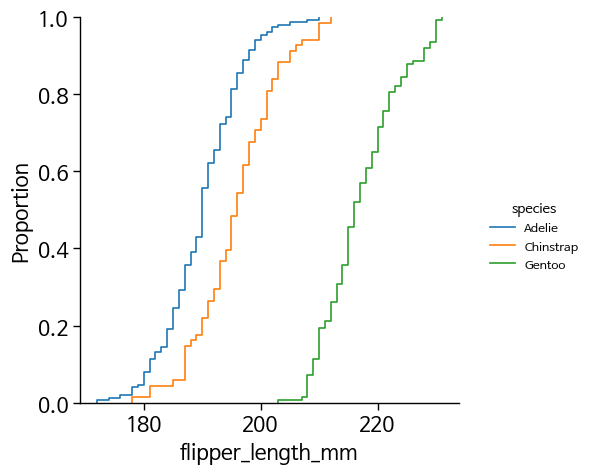

In [ ]:
# kind='ecdf', hue='species'
sns.displot(df_penguins, x = 'flipper_length_mm', kind = 'ecdf', hue = 'species')

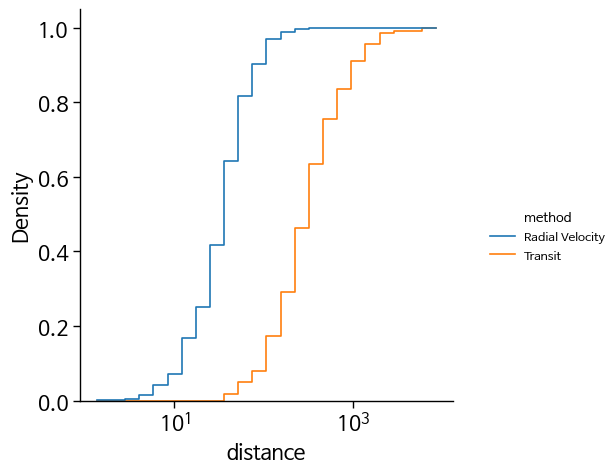

In [ ]:
# hue='method', hue_order = ['Radial Velocity', 'Transit'], log_scale = True,
# element='step', fill=False, cumulative=True, stat='density', common_norm=False
sns.displot(data = df_planets, x = 'distance', hue = 'method',
            hue_order = ['Radial Velocity', 'Transit'],
            log_scale = True, element = 'step', fill = False,
            cumulative = True, stat = 'density', common_norm = False)

<Axes: xlabel='bill_length_mm', ylabel='Proportion'>

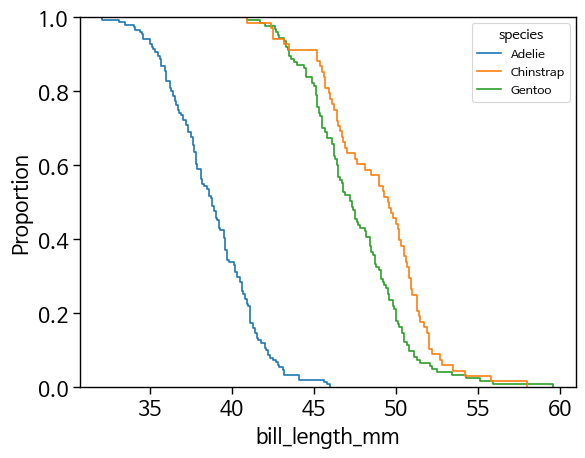

In [ ]:
# 상보 누적분포함수 그리기
# hue='species', complementary=True
sns.ecdfplot(data = df_penguins, x = 'bill_length_mm', hue = 'species', complementary = True)

### 8) 상자그림

#### 기본
 - Seaborn 에서 상자그림을 만들려면, ```sns.boxplot``` 함수를 이용하면 됩니다. ```sns.catplot``` 함수에 ```kind='box'``` 옵션을 추가해도 됩니다.

<Axes: >

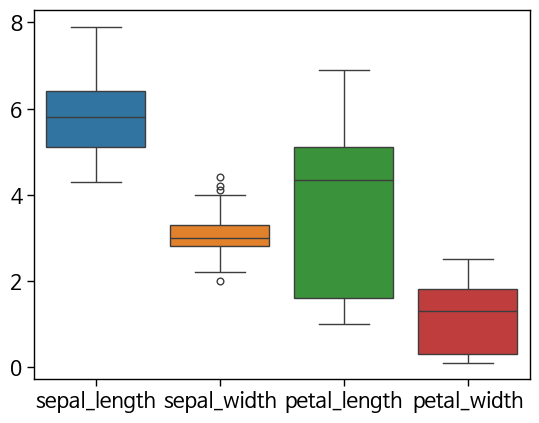

In [ ]:
sns.boxplot(data = df_iris)

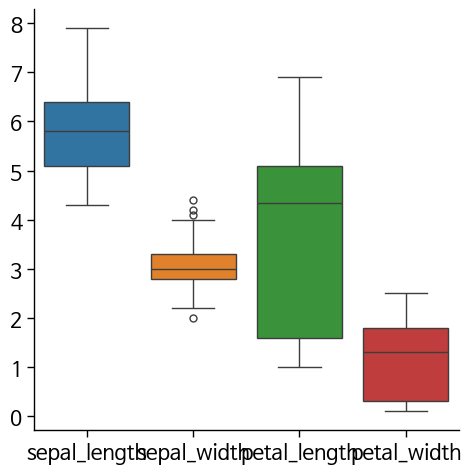

In [ ]:
sns.catplot(data = df_iris, kind='box')

만일 상자그림을 수평으로 그리고 싶다면, ```orient='h'``` 옵션을 추가하면 됩니다.

<Axes: >

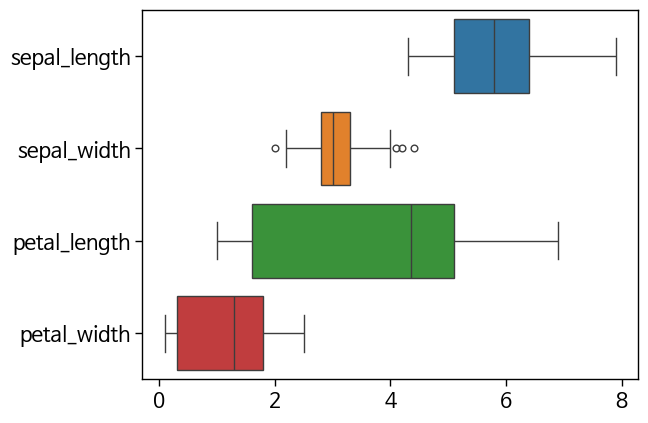

In [ ]:
sns.boxplot(data = df_iris, orient = 'h')

3차원 박스플롯은 ```hue``` 옵션을 추가해서 그릴 수 있습니다. ```hue``` 파라미터를 더하면 비슷한 속성의 데이터끼리 분류할 수 있습니다.

<Axes: xlabel='total_bill', ylabel='day'>

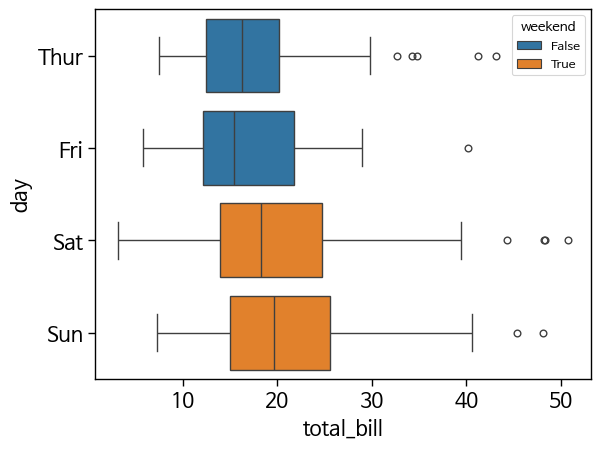

In [ ]:
df_tips['weekend'] = df_tips['day'].isin(['Sat', 'Sun'])
sns.boxplot(data = df_tips, x = 'total_bill', y = 'day', hue='weekend', orient = 'h', dodge=False)

#### 박슨 플롯
- 박슨 플롯은 데이터를 여러 개의 분위로 나눈 박스플롯입니다. 박슨 플롯은 데이터셋을 더 많은 분위수(quantiles)로 나누어 기존의 상자그림보다 이상치(outliers)에 대해 더 많은 정보를 제공합니다. 따라서, 박슨 플롯은 큰 데이터셋을 처리하기에 적합합니다.
- 박슨 플롯을 만들려면 ```sns.boxenplot``` 을 이용하면 됩니다. ```sns.catplot``` 함수에 ```kind='boxen'``` 옵션을 추가해도 됩니다.

<Axes: xlabel='color', ylabel='price'>

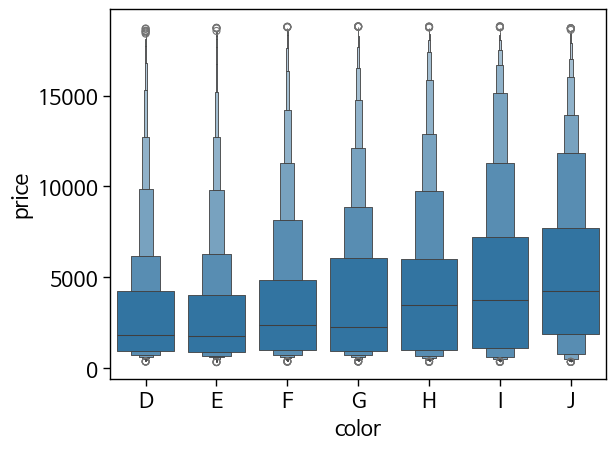

In [ ]:
sns.boxenplot(data = df_diamonds.sort_values('color'), x = 'color', y = 'price')

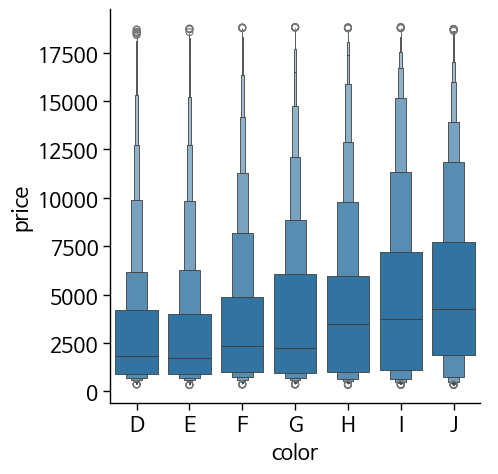

In [ ]:
sns.catplot(data = df_diamonds.sort_values('color'), x = 'color', y = 'price', kind = 'boxen')

#### 바이올린 플롯
- 바이올린 플롯은 상자그림과 KDE방법을 이용해 추정한 확률밀도함수를 합친 그래프입니다. Seaborn으로 바이올린 플롯을 그리고 싶다면 ```sns.violinplot``` 함수를 이용하면 됩니다. ```sns.catplot``` 함수에 ```kind='violin'``` 옵션을 추가해도 동일한 결과를 얻을 수 있습니다.

<Axes: xlabel='total_bill', ylabel='day'>

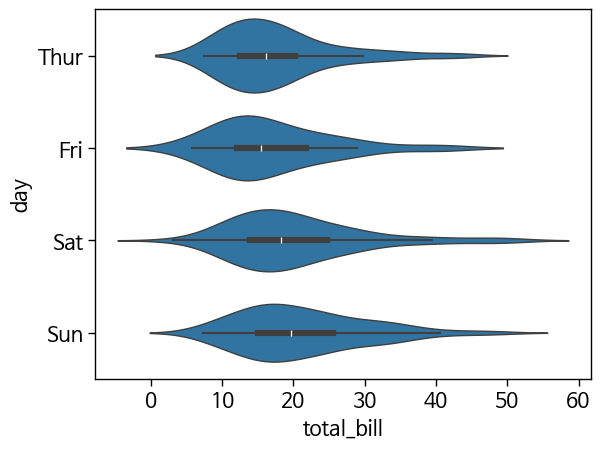

In [ ]:
sns.violinplot(data = df_tips, x = 'total_bill', y = 'day')

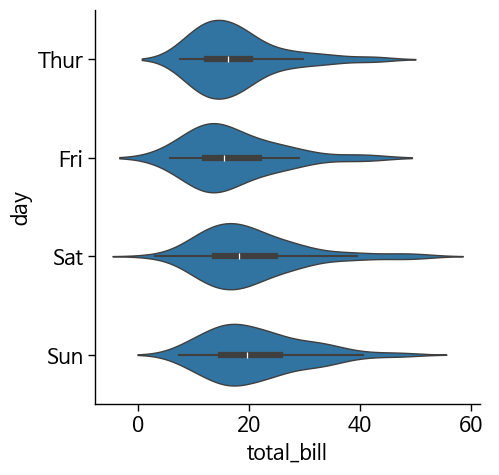

In [ ]:
sns.catplot(data = df_tips, x = 'total_bill', y = 'day', kind = 'violin')

### 9) 선그래프
- 선그래프는 시간 경과에 따른 연속형 변수의 변동을 보여주는 그래프입니다.
- Seaborn으로 선그래프를 그리려면 ```sns.lineplot``` 을 이용하면 됩니다. ```sns.relplot``` 함수에 ```kind='line'``` 옵션을 주어도 됩니다. 다음은 ```flights``` 데이터에서 연별 총 탑승객수를 표현한 그래프입니다.

In [ ]:
# df_flights.head()
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


<Axes: xlabel='year', ylabel='passengers'>

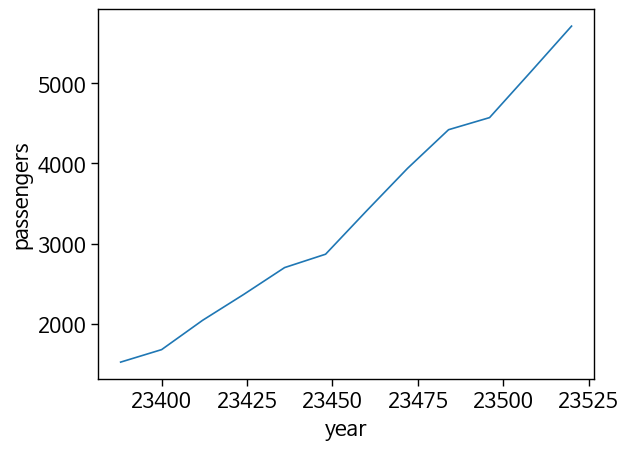

In [ ]:
sns.lineplot(data = df_flights.groupby('year')[['year', 'passengers']].sum(), x = 'year', y = 'passengers')

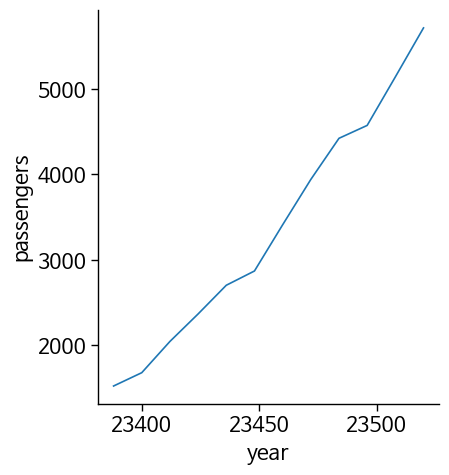

In [ ]:
sns.relplot(data = df_flights.groupby('year')[['year', 'passengers']].sum(), x = 'year', y = 'passengers', kind = 'line')

월별 데이터를 표현하고 싶다면 ```hue```와 ```style``` 옵션을 이용해 데이터를 색상과 스타일로 구분해주면 됩니다.

<Axes: xlabel='year', ylabel='passengers'>

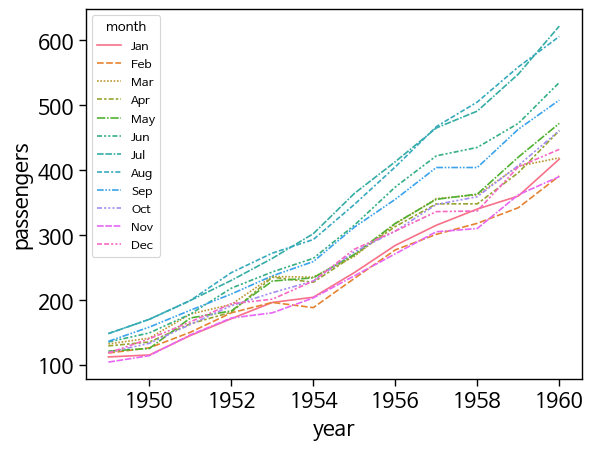

In [ ]:
sns.lineplot(data = df_flights, x = 'year', y = 'passengers', hue = 'month', style = 'month')

```pandas```의 ```pivot``` 함수를 이용해 만든 표를 이용해도 이 그래프와 동일한 결과를 얻을 수 있습니다.

In [ ]:
df_flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [ ]:
#flights_wide = df_flights.pivot(index = 'year', columns = 'month')
flights_wide = df_flights.pivot(index = 'year', columns = 'month')['passengers']
# flights_wide = df_flights.pivot(index = 'year', columns = 'month', values = 'passengers')

flights_wide

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201
1954   204  188  235  227  234  264  302  293  259  229  203  229
1955   242  233  267  269  270  315  364  347  312  274  237  278
1956   284  277  317  313  318  374  413  405  355  306  271  306
1957   315  301  356  348  355  422  465  467  404  347  305  336
1958   340  318  362  348  363  435  491  505  404  359  310  337
1959   360  342  406  396  420  472  548  559  463  407  362  405
1960   417  391  419  461  472  535  622  606  508  461  390  432

### 10) 산점도
- Seaborn 으로 산점도를 그리려면, ```sns.scatterplot``` 함수를 이용하면 됩니다. ```sns.relplot``` 함수에 ```kind='scatter'``` 옵션을 추가해도 됩니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

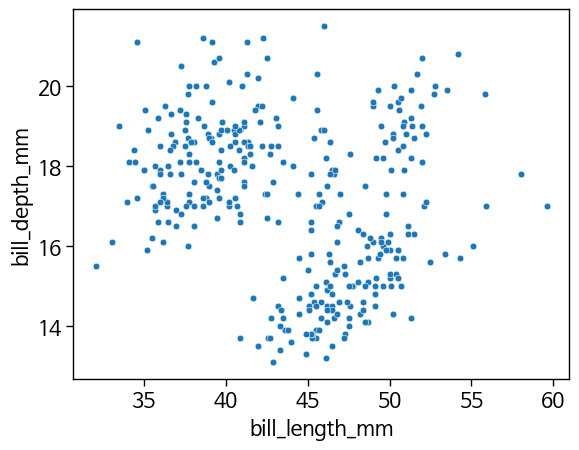

In [ ]:
sns.scatterplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

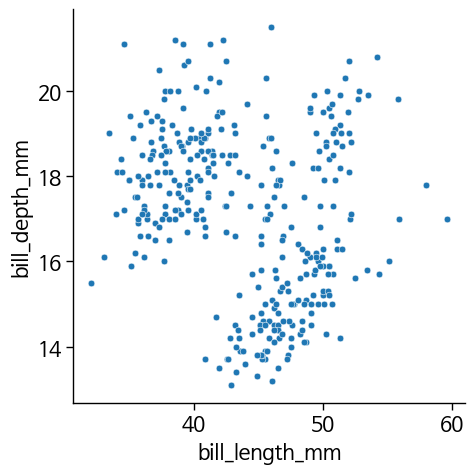

In [ ]:
sns.relplot(x = df_penguins['bill_length_mm'], y = df_penguins['bill_depth_mm'], kind = 'scatter')

이번에는 3차원 데이터를 산점도로 시각화해 보겠습니다. 이전에도 언급했듯 다차원 데이터를 시각화할 때는 ```hue```, ```col```, ```size``` 등 데이터를 구분 지어 줄수 있는 파라미터로 시각화하면 됩니다.
  - style : 마커 모양 자동 지정
  - markers : 마커 모양 수동 지정
  - size : 마커 크기 지정
  - sizes : 마커 크기의 범위 지정
  - legend='full' : 모든 데이터포인트 보이게 하기
  - hue_norm : 색상 범위 지정

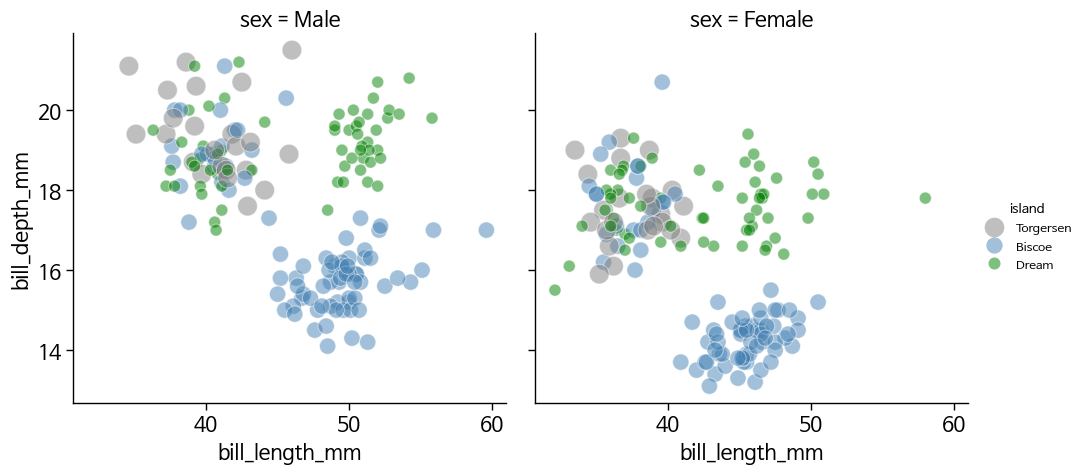

In [ ]:
sns.relplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
            col = 'sex',
            hue = 'island',
            size = 'island',
            palette = ['gray', 'steelblue', 'g'], sizes = (75, 200),
            alpha = .5,
            kind = 'scatter')

### 11) 결합/주변 분포도
- 결합분포(joint distribution)와 주변분포(marginal distribution)를 그리려면 ```sns.jointplot``` 함수를 이용하면 됩니다. ```sns.jointplot``` 은 축 수준(axes-level) 함수 입니다.

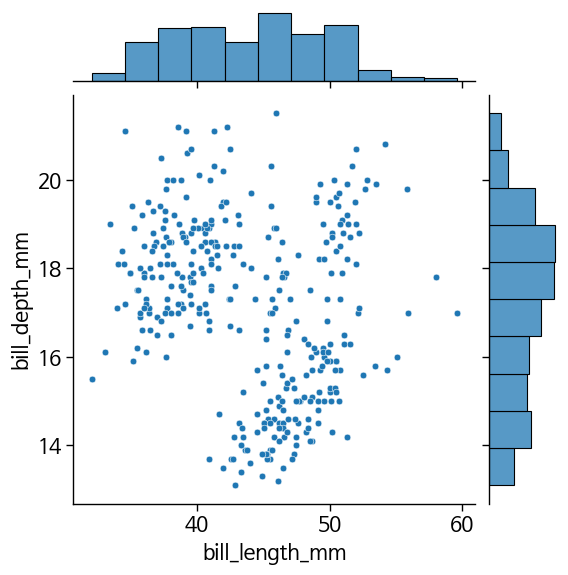

In [ ]:
# 2차원 - 산점도 + 히스토그램
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm')

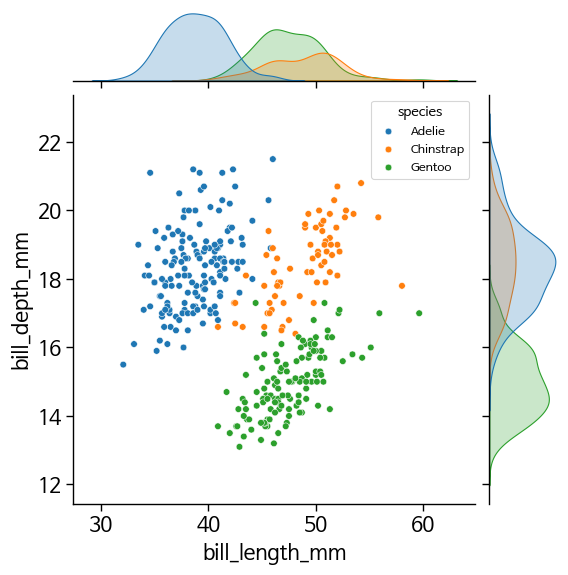

In [ ]:
# 3차원 - 산점도 + KDE 밀도곡선
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

```sns.jointplot``` 함수에 ```kind='kde'``` 옵션을 추가하면, 두 개의 분포는 KDE 그래프를 그립니다.

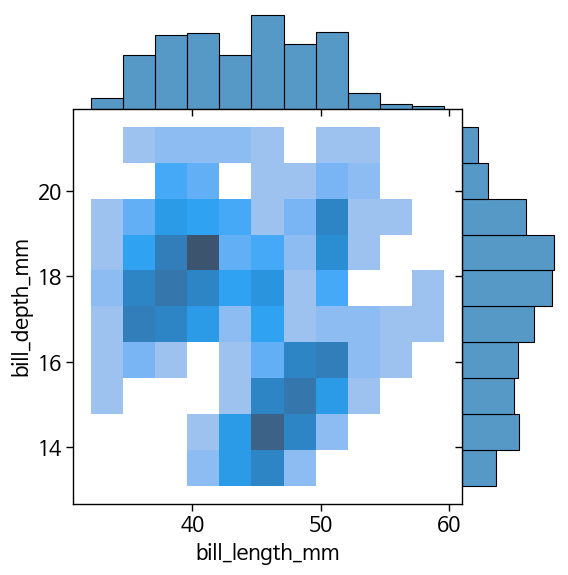

In [ ]:
# kind='hist'
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
              kind = 'hist',      # 이변량 히스토그램(사각형) 그리기
              space = 0,          # x축, y축 공간 0으로 만들기
              #size = 5,           # 크기 조정하기
              ratio = 4           # 비율 조정하기
              )

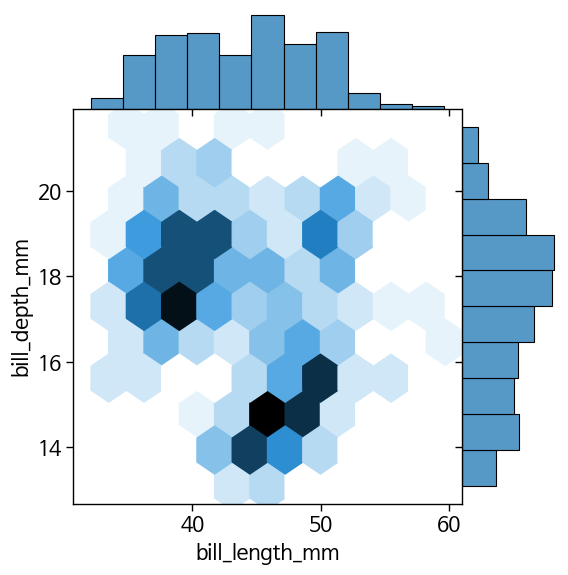

In [ ]:
# kind='hex'
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
              kind = 'hex',      # 이변량 히스토그램(육각형) 그리기
              space = 0,          # x축, y축 공간 0으로 만들기
              #size = 5,           # 크기 조정하기
              ratio = 4           # 비율 조정하기
              )

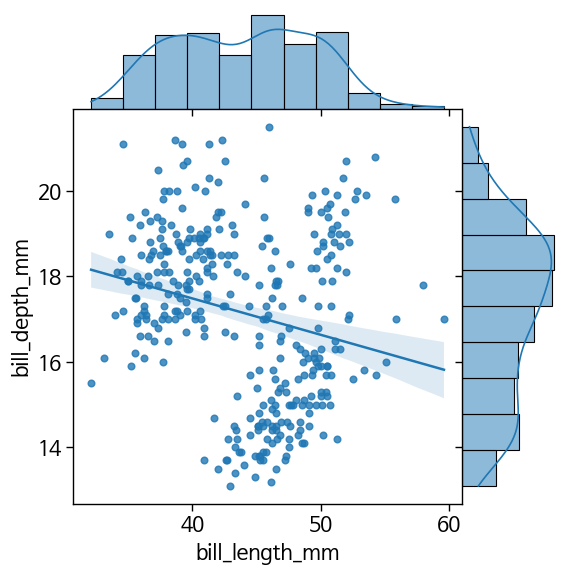

In [ ]:
# kind='reg'
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
              kind = 'reg',      # 선형회귀선, KDE 밀도곡선 추가
              space = 0,          # x축, y축 공간 0으로 만들기
              #size = 5,           # 크기 조정하기
              ratio = 4           # 비율 조정하기
              )

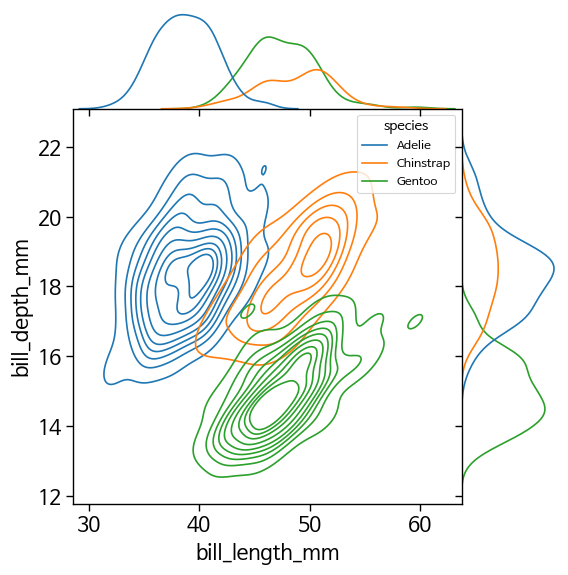

In [ ]:
# kind='kde', hue='species'
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
              kind = 'kde',      # KDE 밀도등고선, KDE 밀도곡선 그리기
              hue = 'species',
              space = 0,          # x축, y축 공간 0으로 만들기
              #size = 5,           # 크기 조정하기
              ratio = 4           # 비율 조정하기
              )

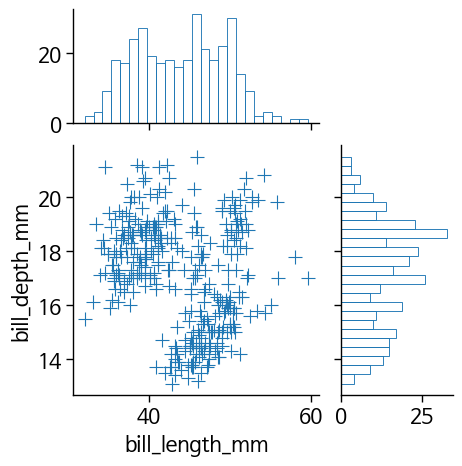

In [ ]:
# marker='+', s=100, marginal_kws=dict(bins=25, fill=False), height=5, ratio=2, marginal_ticks=True
sns.jointplot(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
              marker = '+', s = 100, marginal_kws = dict(bins = 25, fill = False),
              height = 5, ratio = 2, marginal_ticks = True)

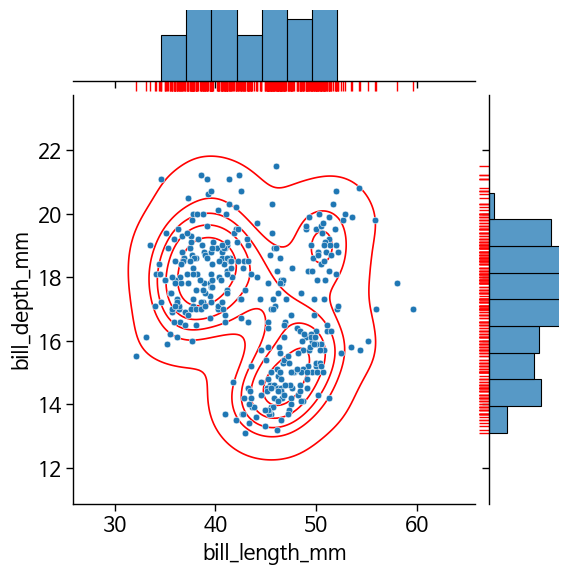

In [ ]:
# g.plot_joint(sns.kdeplot, color='r', zorder=0, levels=6)
# g.plot_marginals(sns.rugplot, color = 'r', height =- .15, clip_on = False)
g = sns.jointplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = df_penguins)
g.plot_joint(sns.kdeplot, color = 'r', zorder = 0, levels = 6)
g.plot_marginals(sns.rugplot, color = 'r', height =- .15, clip_on = False)

더 다양한 종류의 결합분포 및 주변분포를 그리고 싶을 경우에는 그래프 수준(figure-level) 인터페이스인 ```sns.JointGrid``` 를 이용하면 됩니다.

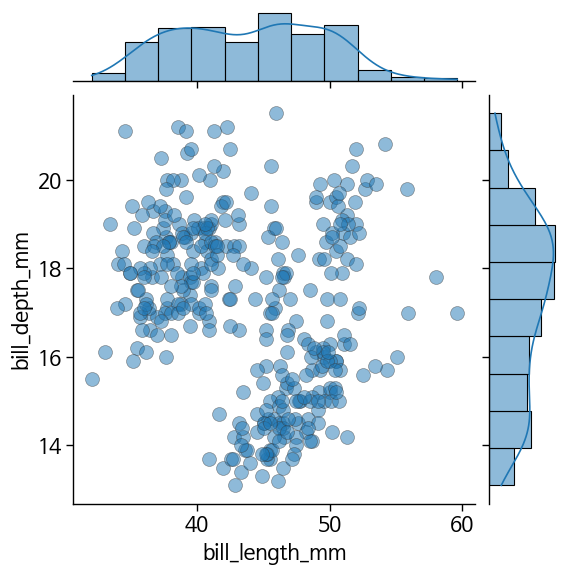

In [ ]:
g = sns.JointGrid(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm')
g.plot_joint(sns.scatterplot, s = 100, alpha = .5, edgecolor = '.2', linewidth = .5)
g.plot_marginals(sns.histplot, kde = True)

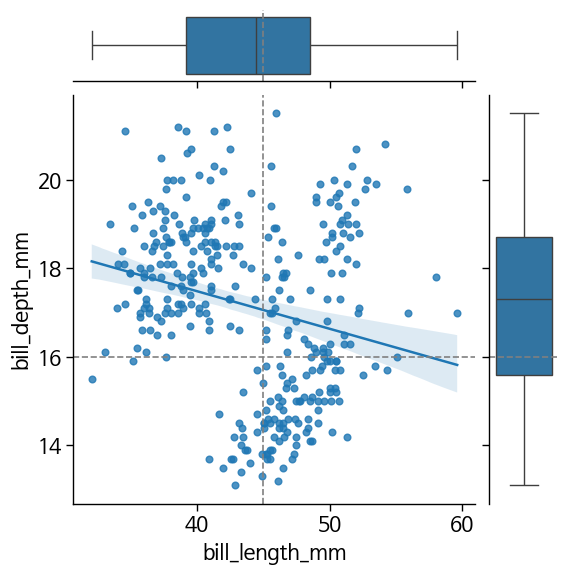

In [ ]:
g = sns.JointGrid(data = df_penguins, x = 'bill_length_mm', y = 'bill_depth_mm')
g.plot(sns.regplot, sns.boxplot)
g.refline(x = 45, y = 16)

### 12) 산점도 행렬
 - 모든 변수에 대해 산점도 행렬을 그리고 싶다면 ```sns.pairplot``` 함수를 이용하면 됩니다.

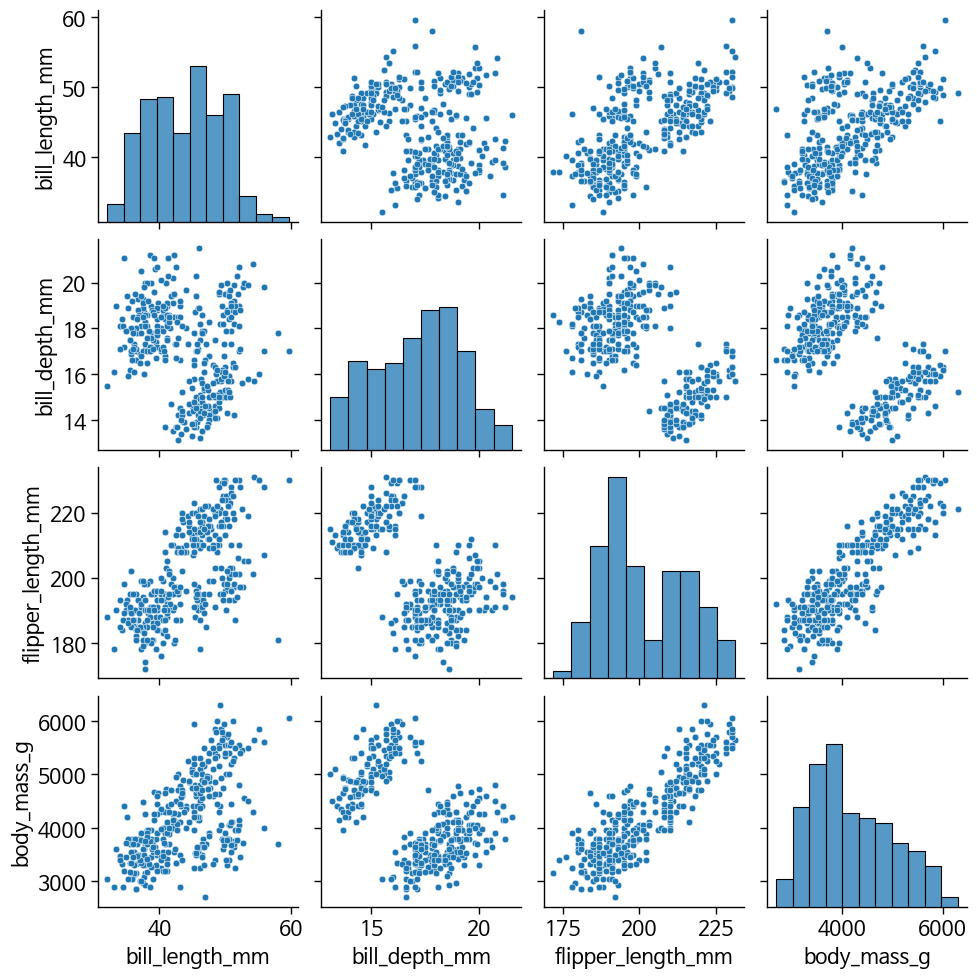

In [ ]:
sns.pairplot(df_penguins)

```corner = True``` 옵션을 추가하면 산점도 행렬의 절반만 그릴 수도 있습니다.

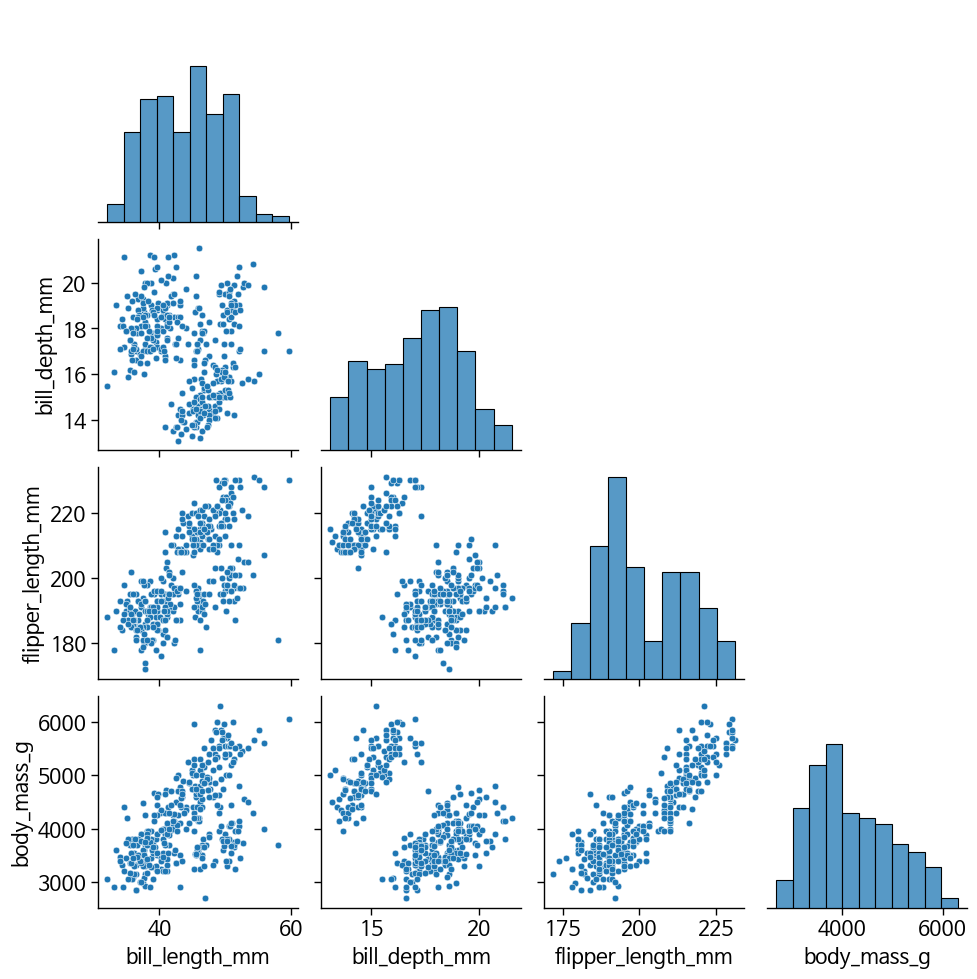

In [ ]:
sns.pairplot(df_penguins, corner = True)

원하는 특정 변수를 지정해서 산점도 행렬을 그릴 수도 있습니다.

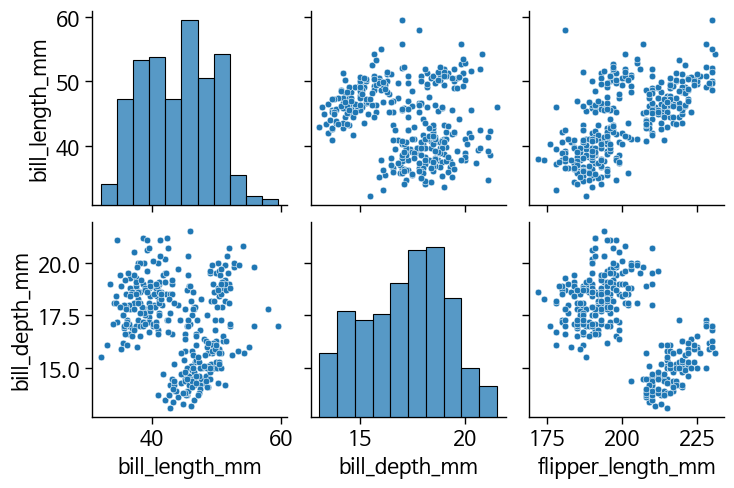

In [ ]:
sns.pairplot(df_penguins,
             x_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars = ['bill_length_mm', 'bill_depth_mm'])

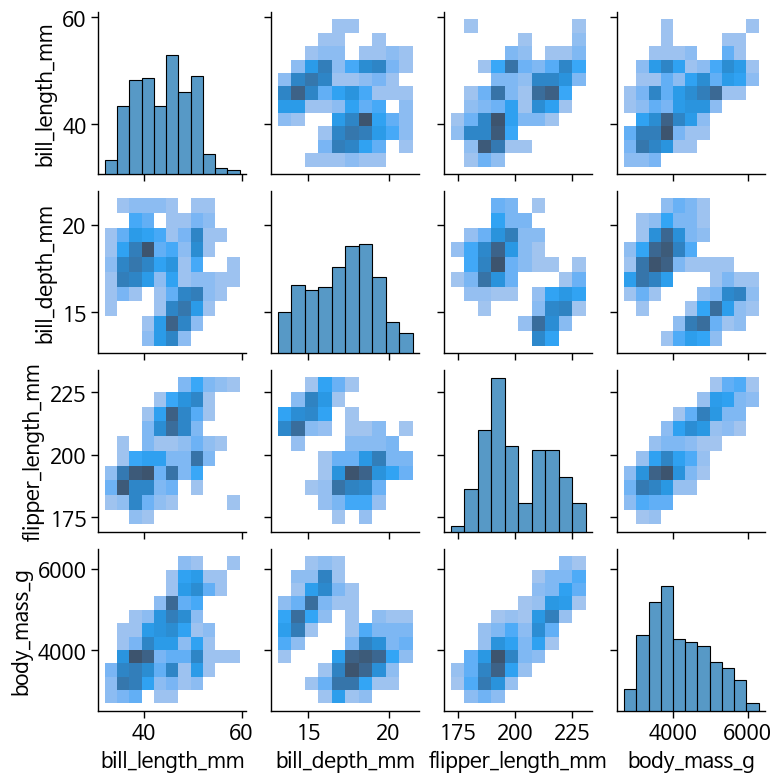

In [ ]:
sns.pairplot(df_penguins, kind = 'hist', height = 2)

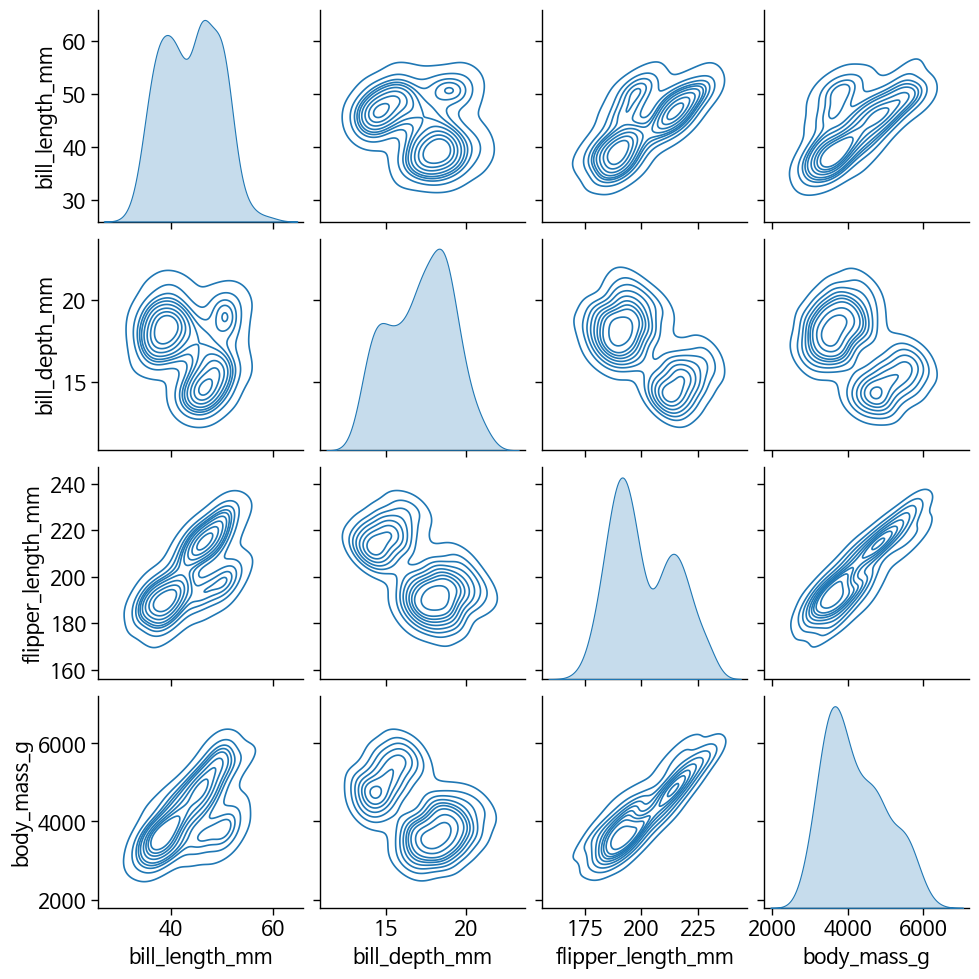

In [ ]:
sns.pairplot(df_penguins, kind = 'kde')    # KDE 곡선 그리기

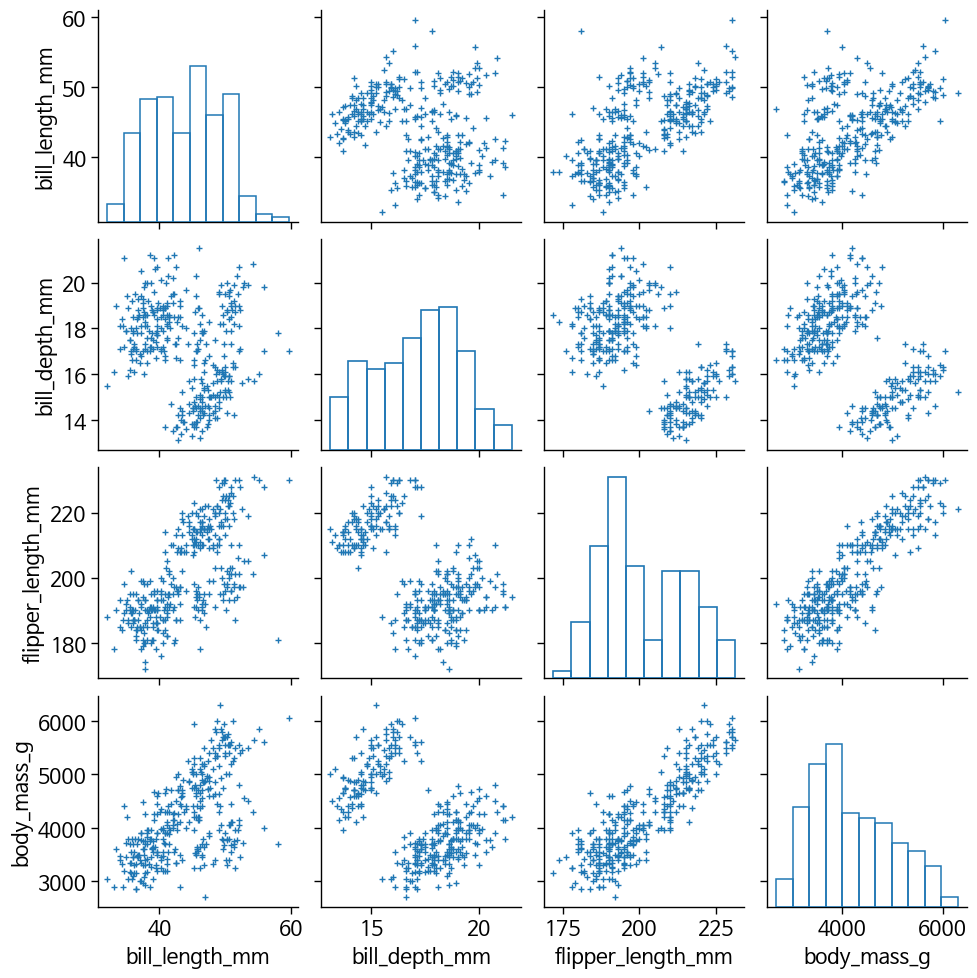

In [ ]:
sns.pairplot(df_penguins,
             plot_kws = dict(marker = '+', linewidth = 1),  # 비대각선 방향에 있는 그래프 옵션
             diag_kws = dict(fill = False))                 # 대각선 방향에 있는 그래프 옵션

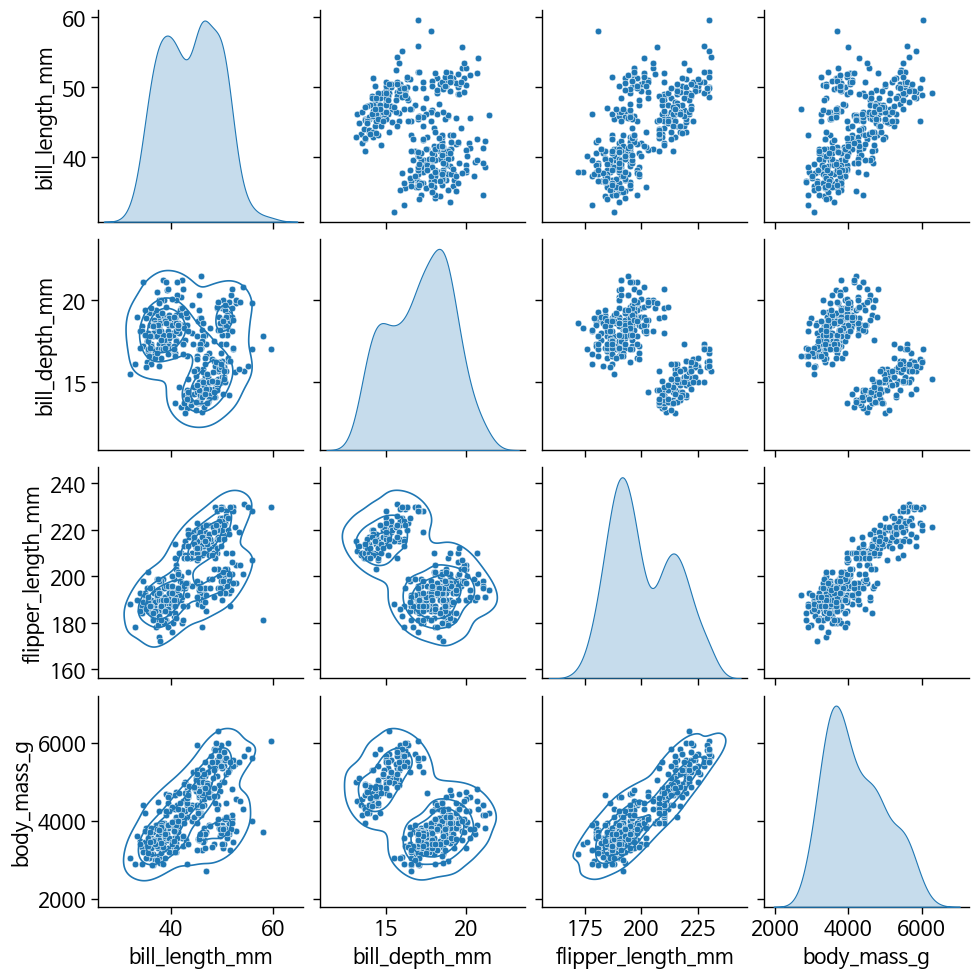

In [ ]:
g = sns.pairplot(df_penguins, diag_kind = 'kde')      # 대각선 그래프는 KDE 함수
g.map_lower(sns.kdeplot, levels = 4, colot = '.2')    # KDE 곡선 수준과 색 지정하기

3차원 이상의 산점도 행렬을 그리려면 ```hue``` 옵션을 추가하면 됩니다.

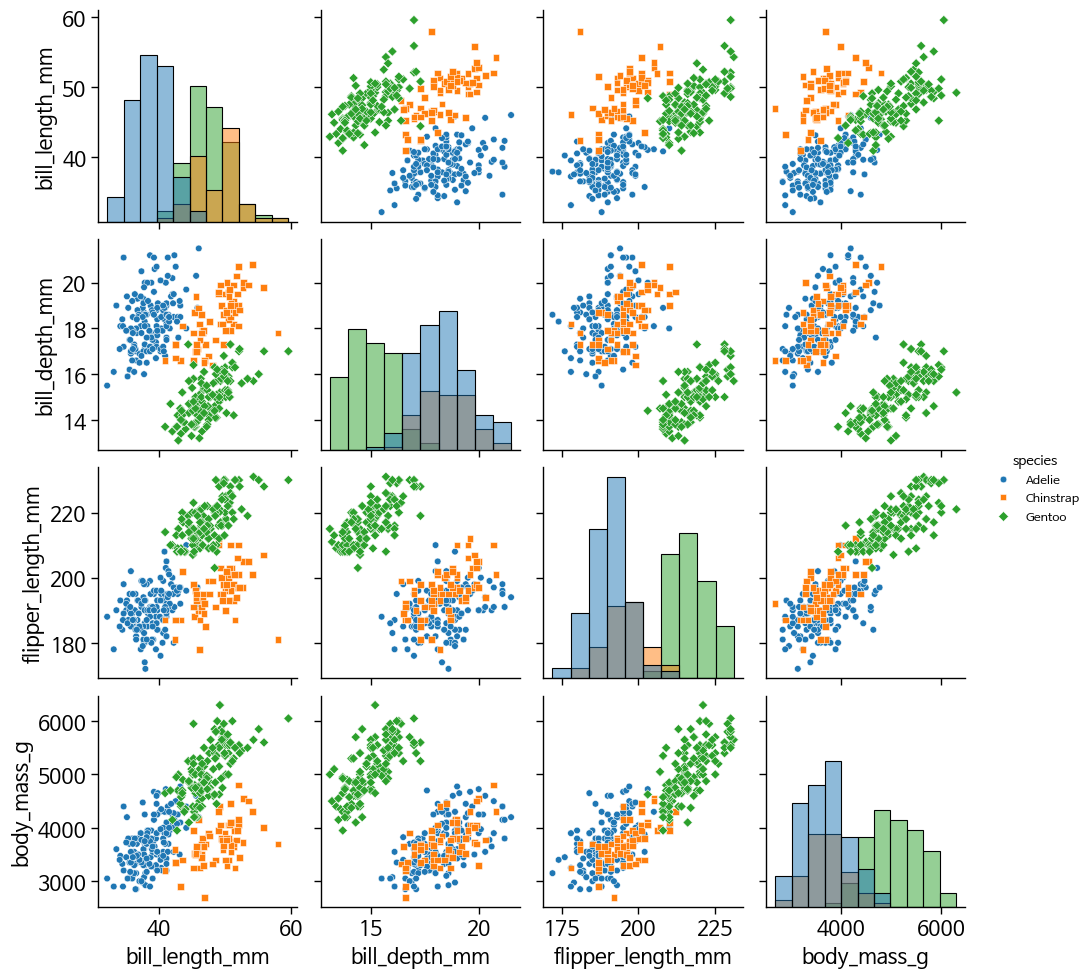

In [ ]:
sns.pairplot(df_penguins, hue = 'species', markers = ['o', 's', 'D'],   # 마커 지정
             diag_kind = 'hist')                                        # 대각선 그래프는 히스토그램


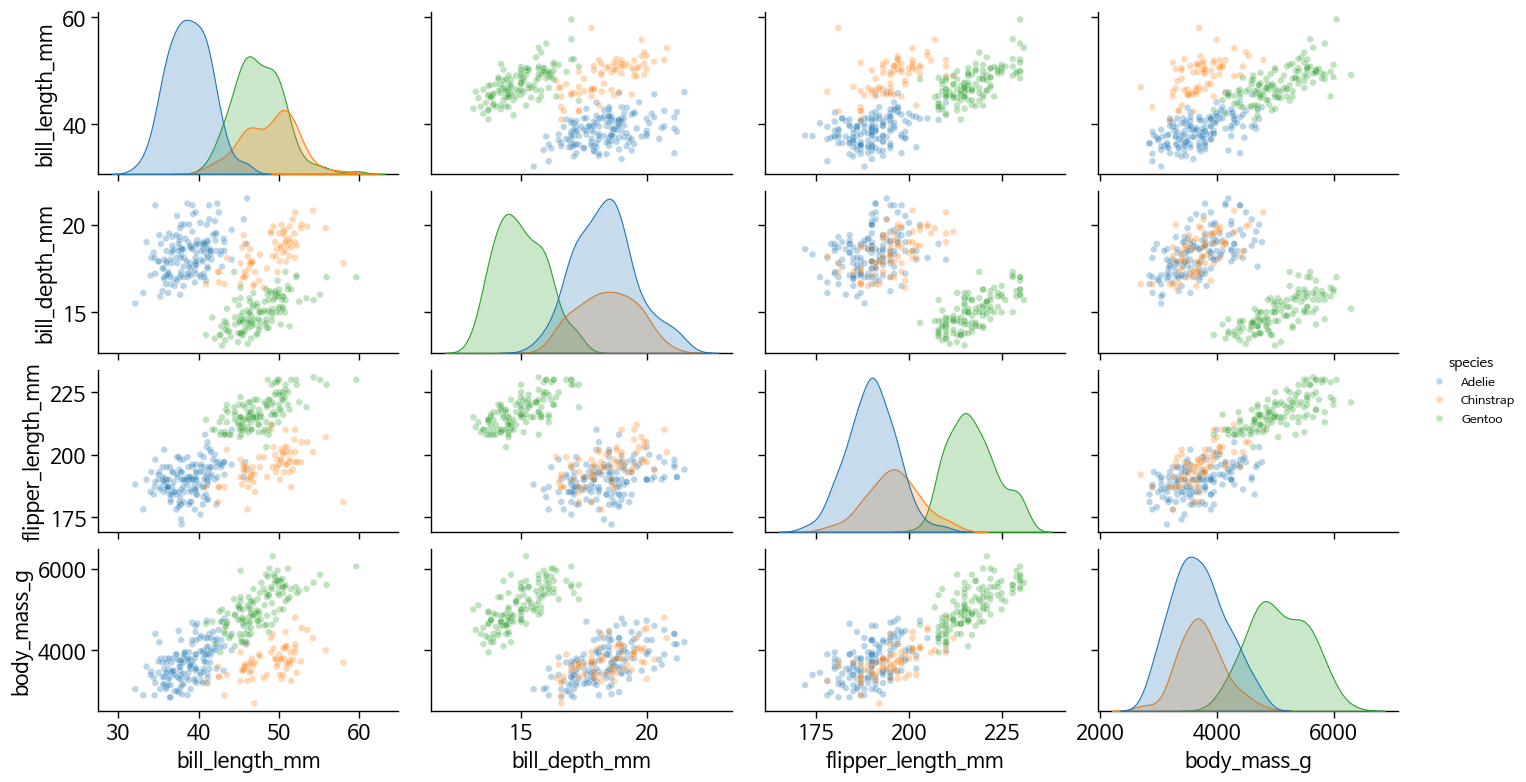

In [ ]:
sns.pairplot(df_penguins,
             hue = 'species',
             size = 2, aspect = 1.8,
             plot_kws = dict(linewidth = 0.5, alpha = 0.3),
             diag_kind = 'kde',
             diag_kws = dict(shade=True))

더 세밀한 산점도 행렬을 그리고 싶다면, 그래프 수준 인터페이스인 ```sns.PairGrid``` 클래스를 이용하면 됩니다. ```sns.PairGrid``` 클래스로는 그리고 싶은 그래프를 직접 지정할 수 있습니다. 다음은 ```sns.kdeplot``` 과 ```sns.histplot``` 함수를 이용해 이변량 히스토그램과 KDE 그래프를 그리는 예제입니다.

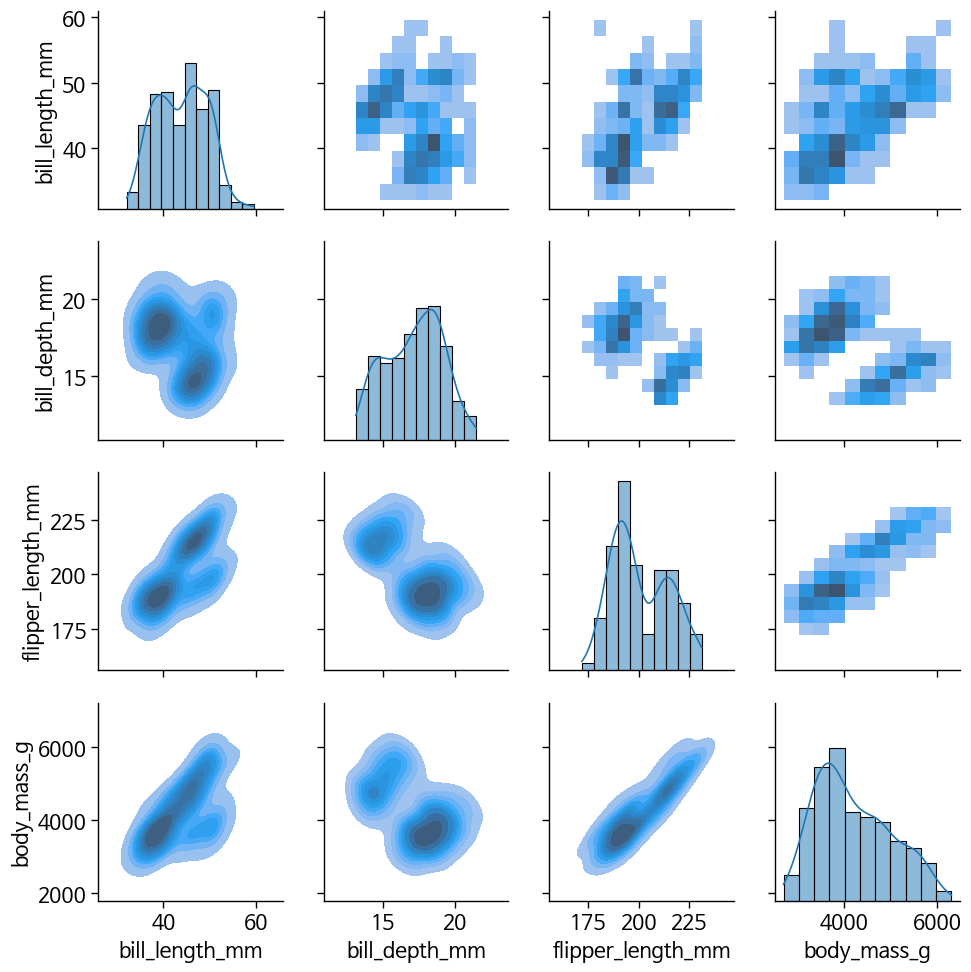

In [ ]:
g = sns.PairGrid(df_penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

### 13) 상관행렬
- Seaborn으로 상관행렬 히트맵(heatmap)을 그리고 싶다면 ```sns.heatmap``` 를 이용하면 됩니다.

#### heatmap
- 상관행렬 히트맵을 만들려면 먼저 상관행렬을 만든 뒤 해당 상관행렬 데이터를 ```sns.heatmap``` 함수에 전달하면 됩니다.

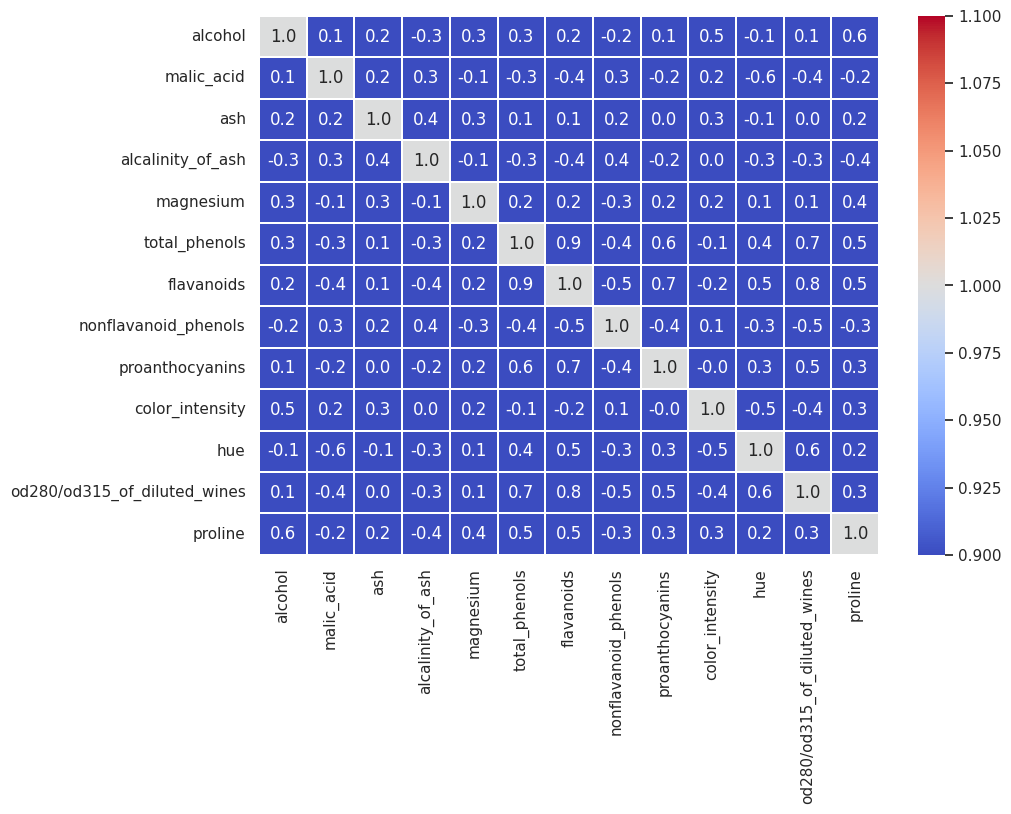

In [ ]:
df_wines = df_wines.sample(frac=1, random_state=7).reset_index(drop=True)   # 샘플 무작위로 만들기
corr = df_wines.corr()                        # 상관행렬표 만들기
sns.heatmap(round(corr, 1),
            annot = True,                     # 상관계수 표시
            fmt = '.1f',                      # 상관계수 소수점 자리
            cmap = 'coolwarm',                # 컬러맵 색상 팔레트
            vmax = 1.0,                       # 상관계수 최댓값
            vmin = 1.0,                       # 상관계수 최소값
            linecolor = 'white',              # 셀 테두리 색상
            linewidths = .005)                 # 셀 간격
sns.set(rc={'figure.figsize' : (10,7)})       # 그래프 그리기


#### clustermap
- Seaborn으로 클러스터맵(cluster map)을 그리려면, ```sns.clustermap``` 함수를 이용하면 됩니다. ```sns.clustermap``` 함수에는 ```sns.heatmap``` 함수와 달리 ```standard_scale``` 파라미터가 있어, 클러스터맵의 범위를 0 ~ 1로 정규화할 수 있습니다.

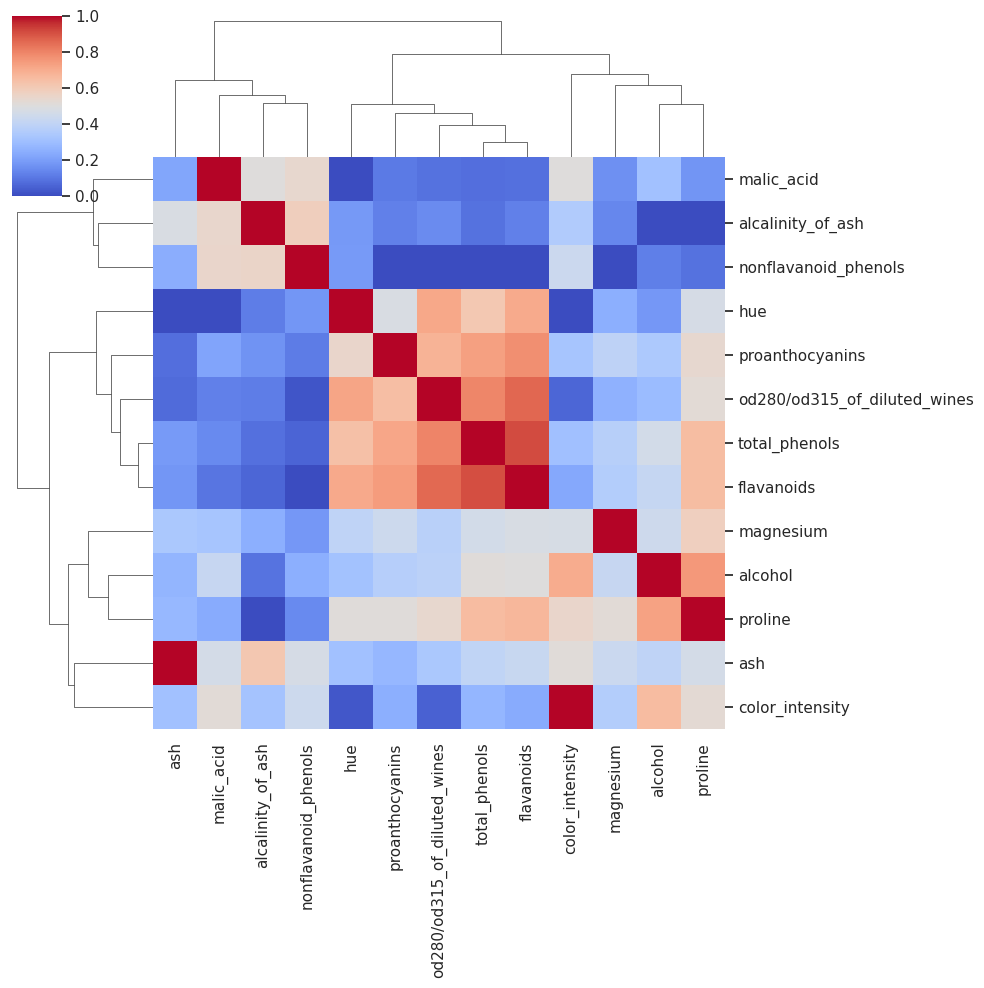

In [ ]:
corr = df_wines.corr()                # 상관행렬표 만들기
sns.clustermap(corr,
               cmap = 'coolwarm',     # 컬러맵 색상 팔레트
               standard_scale = 1)

### 14) 회귀 그래프
- Seaborn으로 회귀 그래프를 그리고 싶다면 ```sns.regplot``` 또는 ```sns.lmplot``` 을 이용하면 됩니다. 먼저 ```sns.regplot``` 사용법부터 살펴보겠습니다.

#### regplot
- ```sns.regplot``` 은 축 수준(axes-level) 함수로 이 함수를 이용하면 산점도에 회귀선(regression line)과 신뢰구간을 추가할 수 있습니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

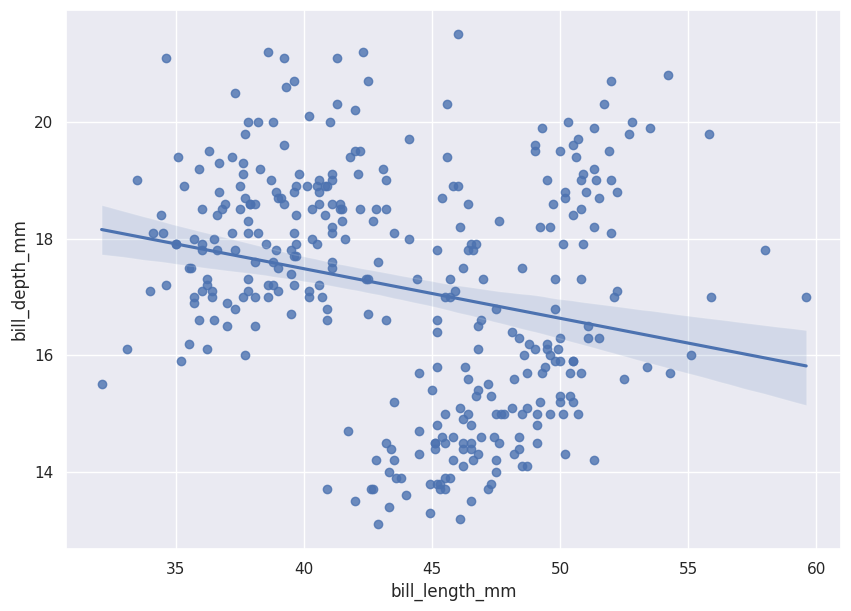

In [ ]:
sns.regplot(x = 'bill_length_mm', y = 'bill_depth_mm', data = df_penguins)

여기에 ```lowess=True``` 옵션을 추가하면 회귀선을 선형이 아니라 중요한 데이터에 가중치를 높이는 국소 회귀(local regression) 기법으로 그립니다. ```lowess```는 ```locally weighted robust scatterplot smoothing``` 의 약자입니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

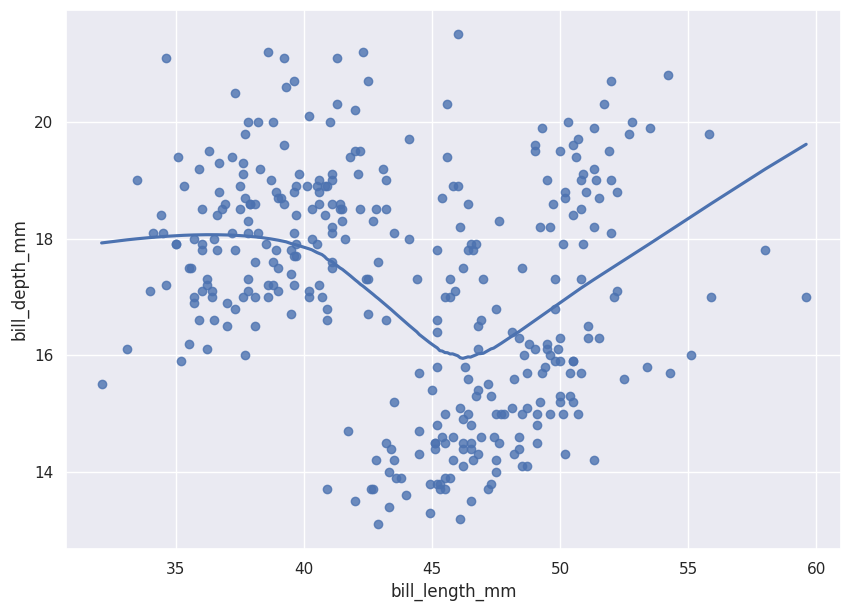

In [ ]:
sns.regplot(x = 'bill_length_mm', y = 'bill_depth_mm',
            lowess = True,
            data = df_penguins)

- scatter_kws : 점 색상(facecolor, fc), 점 테두리 색상(edgecolor, ec), 크기(size, s), 투명도 지정
- color : 선 색상 지정
- line_kws : 선 굵기(linewidth, lw), 선 스타일(line style, ls), 투명도 지정
- ci : 신뢰구간 지정 (기본값 : 95)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

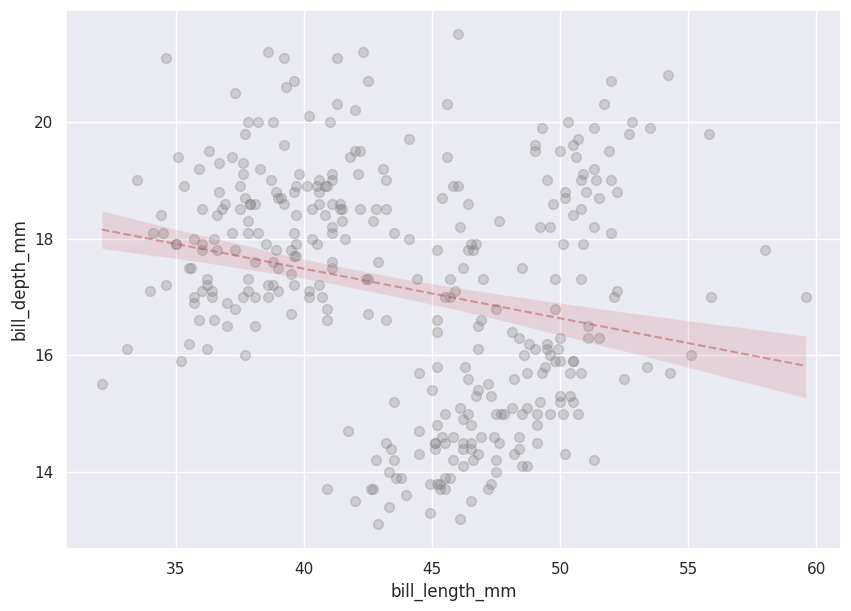

In [ ]:
sns.regplot(x = 'bill_length_mm', y = 'bill_depth_mm',
            scatter_kws = {'fc' : 'gray', 'ec' : 'gray', 's' : 50, 'alpha' : 0.3},
            color = 'r',
            line_kws = {'lw' : 1.5, 'ls' : '--', 'alpha' : 0.5},
            ci = 90,
            data = df_penguins)

#### lmplot
 - ```sns.lmplot``` 역시 ```sns.regplot``` 과 마찬가지로 회귀 그래프를 만들 수 있습니다. 단 ```sns.lmplot``` 은 그래프 수준(figure-level) 함수로 ```FacetGrid``` 를 만듭니다. ```sns.lmplot```은 그래프 수준 함수이기 때문에 ```sns.regplot```에서와 달리 ```hue``` 또는 ```col``` 옵션을 사용할 수 있습니다.

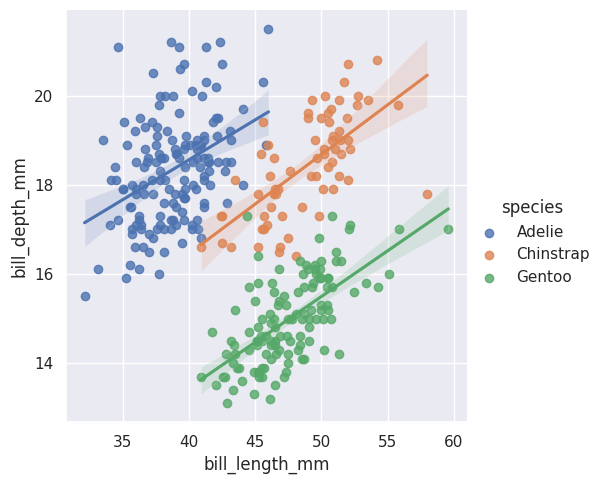

In [ ]:
sns.lmplot(x = 'bill_length_mm', y = 'bill_depth_mm',
           hue = 'species',
           data = df_penguins)

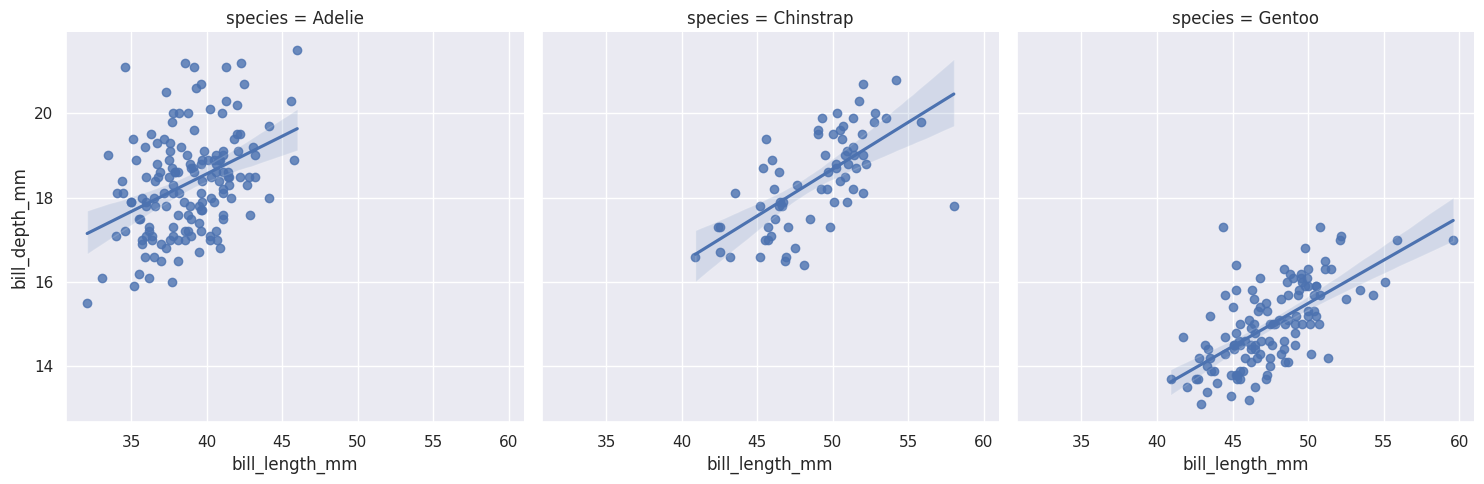

In [ ]:
sns.lmplot(x = 'bill_length_mm', y = 'bill_depth_mm',
           col = 'species',
           data = df_penguins)

전체 데이터 포인트를 배경으로 만들고 싶다면 다음 코드를 이용하면 됩니다.
- truncate=False : 회귀선 x축 끝까지 표현하지 않기
- facet_kws=dict(sharex=False, sharey=False) : x축,y축 공유하지 않기
- line_kws : 회귀선 스타일 지정하기
- scatter_kws : 산점도 점 스타일 지정하

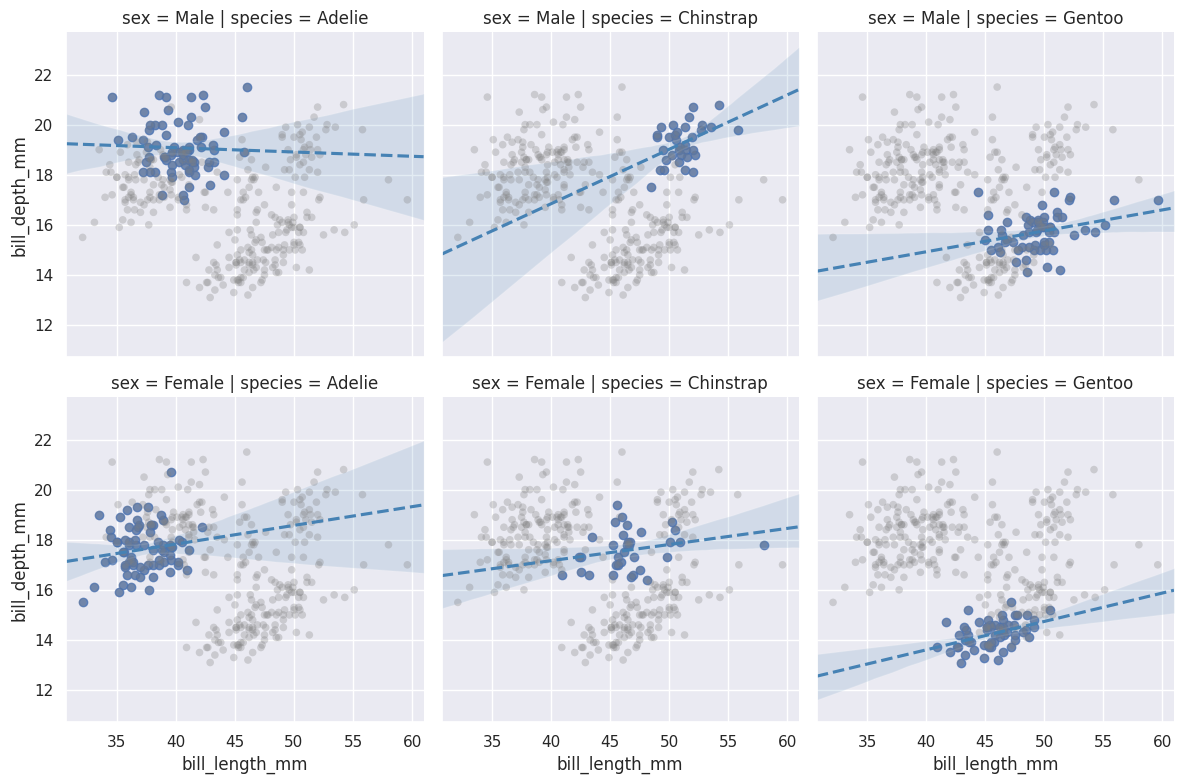

In [ ]:
g = sns.lmplot(x = 'bill_length_mm', y = 'bill_depth_mm',
               col = 'species', row = 'sex',
               height = 4,
               truncate = False,
               line_kws = {'color' : 'steelblue', 'linestyle' : '--'},
               data = df_penguins)

axes = g.axes
for ax in axes.ravel():
  sns.regplot(x = 'bill_length_mm', y = 'bill_depth_mm',
              fit_reg=False,
              scatter_kws = {'fc' : 'gray', 'ec' : 'none', 's' : 30, 'alpha' : 0.3},
              ax = ax,
              data = df_penguins)

#### residplot
- ```sns.resideplot``` 은 실제 데이터포인트와 회귀선과의 잔차(residuals)를 표현하는 함수입니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

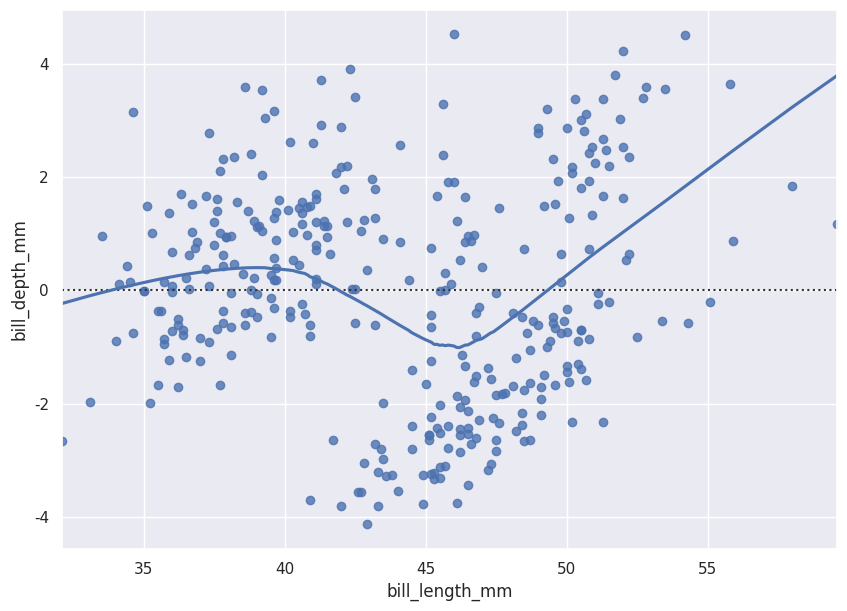

In [ ]:
sns.residplot(x = 'bill_length_mm', y = 'bill_depth_mm',
              lowess = True,
              data = df_penguins)